In [1205]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import regex as re

from sklearn.neighbors import KernelDensity
pd.options.display.max_columns = None
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge  , LogisticRegression , QuantileRegressor
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor , HistGradientBoostingRegressor 
from sklearn.metrics import mean_absolute_percentage_error , r2_score
from sklearn.model_selection import train_test_split, cross_validate
 
from xgboost import XGBRegressor



from geopy.geocoders import Nominatim
from concurrent.futures import ThreadPoolExecutor



###########################################################################################################################

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from hazm import word_tokenize, stopwords_list
# from dadmatools.models.normalizer import Normalizer

import pandas as pd
from hazm import *
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import re
from string import punctuation
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import json
import arabic_reshaper
from bidi.algorithm import get_display


In [1206]:
data_test= pd.read_csv('test.csv')


In [1207]:
data= pd.read_csv('train.csv')
data_test= pd.read_csv('test.csv')

data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11 سال ساخت,1,2.0,"2,200,000,000 تومان"
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7 سال ساخت,1,2.0,"4,800,000,000 تومان"
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,تازه ساز,2,2.0,"10,200,000,000 تومان"
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6 سال ساخت,4,1.0,"870,000,000 تومان"
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,تازه ساز,همکف,3.0,"5,350,000,000 تومان"
...,...,...,...,...,...,...,...,...,...,...
48116,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4 سال ساخت,3,2.0,"4,100,000,000 تومان"
48117,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15 سال ساخت,1,2.0,"5,500,000,000 تومان"
48118,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4 سال ساخت,2,3.0,"4,100,000,000 تومان"
48119,فروش آپارتمان,85.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متری دوخواب\r\n متری \nشمالی\nد...,36.327670,59.548380,13 سال ساخت,3,2.0,"3,200,000,000 تومان"


In [1208]:
print(data.iloc[0]['description'])

   متر امیریه/سند آماده/آسانسور پارکینگ/فول
لوکیشن عالی از لحاظ دسترسی به خدمات رفاهی 
طبقه اول با آسانسور 
  طبقه    واحد 
عکسها واقعی می‌باشد 
 خواب 
سند آماده
تخلیه 
فول امکانات
فروشنده واقعی
تخفیف ویژه پای قرارداد 
فایل شخصیسال ساخت      -    خواب   :                 - طبقه   - آسانسور دارد - پارکینگ دارد - انباری دارد -  


In [1209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48121 entries, 0 to 48120
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          48121 non-null  object 
 1   area          48121 non-null  float64
 2   neighborhood  48120 non-null  object 
 3   description   45838 non-null  object 
 4   latitude      48120 non-null  float64
 5   longitude     48120 non-null  float64
 6   age           47649 non-null  object 
 7   floor         48121 non-null  object 
 8   bedrooms      48119 non-null  float64
 9   price         48121 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.7+ MB


In [1210]:
data.age.value_counts()

تازه ساز         15111
1 سال ساخت        4026
12 سال ساخت       2287
2 سال ساخت        2249
7 سال ساخت        2039
6 سال ساخت        1866
17 سال ساخت       1733
5 سال ساخت        1576
4 سال ساخت        1498
14 سال ساخت       1386
3 سال ساخت        1383
10 سال ساخت       1366
8 سال ساخت        1256
9 سال ساخت        1192
11 سال ساخت       1154
16 سال ساخت       1093
15 سال ساخت       1057
13 سال ساخت        970
22 سال ساخت        913
30 سال ساخت        818
20 سال ساخت        458
18 سال ساخت        451
19 سال ساخت        359
27 سال ساخت        321
21 سال ساخت        318
31 سال ساخت        149
24 سال ساخت        134
26 سال ساخت        118
25 سال ساخت        110
23 سال ساخت        109
29 سال ساخت         83
28 سال ساخت         55
1402 سال ساخت        3
40 سال ساخت          3
98 سال ساخت          1
1387 سال ساخت        1
1401 سال ساخت        1
38 سال ساخت          1
41 سال ساخت          1
Name: age, dtype: int64

In [1211]:
data.floor.value_counts()

همکف    9716
3       9240
2       9065
1       8090
4       6542
5       3409
6       1585
7        222
8         76
9         52
10        30
-1        23
11        19
-130      11
12        10
13         5
20         5
16         5
14         5
18         3
15         2
21         2
17         2
30         1
22         1
Name: floor, dtype: int64

In [1212]:
data.bedrooms.value_counts()

2.0     23865
3.0     14346
1.0      4289
0.0      2316
4.0      1856
5.0      1429
6.0        12
8.0         2
12.0        2
11.0        1
7.0         1
Name: bedrooms, dtype: int64

# Data prepration &  EDA

In [1213]:
data['price']= data['price'].apply(lambda x: re.sub(r'[^\d]', '', x))
data['price']=data['price'].replace('' , '0')
data['price']=data['price'].astype('int64')

data['age']= data['age'].apply(lambda x: 0 if  x=='تازه ساز' else x)
data['age']=data['age'].apply(lambda x: str(x).replace('سال ساخت' , ''))
data['age']=data['age'].replace('nan' , np.nan)
data['age']=data['age'].astype('float64')

data['floor']=data['floor'].apply(lambda x: str(x).replace('همکف' , '0'))
data['floor']=data['floor'].astype('int64')

In [1214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48121 entries, 0 to 48120
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          48121 non-null  object 
 1   area          48121 non-null  float64
 2   neighborhood  48120 non-null  object 
 3   description   45838 non-null  object 
 4   latitude      48120 non-null  float64
 5   longitude     48120 non-null  float64
 6   age           47649 non-null  float64
 7   floor         48121 non-null  int64  
 8   bedrooms      48119 non-null  float64
 9   price         48121 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.7+ MB


In [1215]:
#drop or fill 
data=data.dropna(subset=['bedrooms' , 'latitude' , 'longitude' , 'age' , 'neighborhood'])
data.reset_index(inplace=True , drop=True)


In [1216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47646 entries, 0 to 47645
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          47646 non-null  object 
 1   area          47646 non-null  float64
 2   neighborhood  47646 non-null  object 
 3   description   45371 non-null  object 
 4   latitude      47646 non-null  float64
 5   longitude     47646 non-null  float64
 6   age           47646 non-null  float64
 7   floor         47646 non-null  int64  
 8   bedrooms      47646 non-null  float64
 9   price         47646 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.6+ MB


In [1217]:
#خونه هایی هست که سرش مغازه داره! :)
j=0
for i in range(data.index.max()):
    if 'مغازه' in str(data['description'][i]) and data['floor'][i]==0:
        print(data['description'][i] + '=======>' + str(i))
        print('///////////////////////////////////////////////////////////////////////////////////////////////////////')
        
        j+=1
        
print('sum of shop : '  + str(j))

 فروش ساختمان تجاری با   دربند مغازه خیابان جنت
کارگزاری املاک پارسه ( حامد طلوع یزدی )
آدرس : بین امام رضا   و   جنب هتل قصر طلایی 

...................                    
بهترین گزینه برای سرمایه گزاری 
واقع شده در بهترین لوکیشن تجاری خیابان جنت 

عرصه     متر 
اعیان      متر تمام تجارتی 
دارای   دربند مغازه تجاری به همراه انبار 
دارای   طبقه     متری تجاری
منفی یک کامل تجاری

سند ملکی 

سند آماده انتقال  
........................
کارشناس فروش : حسین نعمتی 
فقط تماس پاسخگو هستمسال ساخت قبل از      - +   خواب   :                   - پارکینگ ندارد - انباری دارد - بالکن دارد -  =======>19
///////////////////////////////////////////////////////////////////////////////////////////////////////
 ویلایی شهرستان سرخس جهت معاوضه با مشهد
ویلایی دوطبقه در حاشیه بلوار شهید باهنر شمالی . مناسب برای تبدیل به تجاری و مغازه . منطقه رو به رشد .سال ساخت      -    خواب   :                 - پارکینگ دارد - انباری دارد - بالکن ندارد - سند : قول‌نامه‌ای - جهت ساختمان : شمالی - وضعیت واحد : بازسازی شده -  

In [1218]:
#خونه هایی هست که سرش مغازه داره! :) in test data

j=0
for i in range(data_test.index.max()):
    if 'مغازه' in str(data_test['description'][i]) and data['floor'][i]==0 :
        print(data_test['description'][i] + '=======>' + str(i))
        print('///////////////////////////////////////////////////////////////////////////////////////////////////////')
        
        j+=1
        
print('sum of shop : '  + str(j))

 آپارتمان    متری بازسازی شده
آپارتمان واقع در سجادیه سه 

   متری یک خوابه بازسازی شده 

کف سرامیک 

کابینت ام دی اف 

سرمایش کولر آبی 

حفاظ در

پله ها نرم و راحت 

تمامی دیوارهای راه پله تازگی رنگ شده 

دارای کمد دیواری تو اتاق 

نور گیر 

سند آماده است 

خونه دست مستاجره تا برج   

پارکینگ نداره اما فضای جلوی خونه برای پارک کردن ماشین خیلی زیاده و کسی مشکل برای جا پارک نداره

دسترسی به آسان به فضای سبز و مسجد و مغازه و...سال ساخت      -    خواب   :                 - طبقه   از   - آسانسور ندارد - پارکینگ ندارد - انباری ندارد - تعداد واحد در طبقه   - وضعیت واحد : بازسازی شده -  =======>7
///////////////////////////////////////////////////////////////////////////////////////////////////////
 آپارتمان     متر سردونبش سرحاشیه بلوار
آپارتمان فوق در مشهد می باشد سردونبش و در حاشیه بلوار، دارای    متر حاشیه دسترسی به ایستگاه اتوبوس و مغازه و مدرسه و غیره آسان تا حرم    دقیقه . پذیرایی   قالی    متری می خوره اتاق خواب    متری و یک خواب   متری آشپزخانه بزرگ خلاصه مناسب برای خانواده های پر جم

In [1219]:
data.describe()

,area,latitude,longitude,age,floor,bedrooms,price
count,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,47646.000000,4.764600e+04
mean,160.608286,36.331176,59.529057,6.986022,2.264429,2.283780,6.522676e+09
std,1960.411383,0.034421,0.054109,16.209496,2.702717,0.967344,2.665702e+10
min,0.000000,34.929853,58.863373,0.000000,-130.000000,0.000000,0.000000e+00
25%,85.000000,36.310605,59.475820,0.000000,1.000000,2.000000,2.500000e+09
50%,112.000000,36.327540,59.515093,4.000000,2.000000,2.000000,3.800000e+09
75%,157.000000,36.365378,59.570239,12.000000,3.000000,3.000000,6.500000e+09
max,300000.000000,36.528536,60.525852,1402.000000,30.000000,12.000000,4.300000e+12


In [1220]:
#cleaning "age" column
data['age']=data['age'].apply(lambda x: 1402-x if x>100 else x)
data[data['age']==98]=1402-1398

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\4014567152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age']=data['age'].apply(lambda x: 1402-x if x>100 else x)
C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\4014567152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['age']==98]=1402-1398


In [1221]:
data.age.value_counts()

0.0     15113
1.0      4027
12.0     2287
2.0      2249
7.0      2038
6.0      1866
17.0     1733
5.0      1576
4.0      1499
14.0     1386
3.0      1383
10.0     1366
8.0      1256
9.0      1192
11.0     1153
16.0     1093
15.0     1058
13.0      970
22.0      913
30.0      818
20.0      458
18.0      451
19.0      359
27.0      321
21.0      318
31.0      149
24.0      134
26.0      118
25.0      110
23.0      109
29.0       83
28.0       55
40.0        3
38.0        1
41.0        1
Name: age, dtype: int64

In [1222]:
index = data[(data['price']%1000)!=0].index
data.iloc[index]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
209,فروش آپارتمان,170.0,منطقه 12 محله الهیه خیابان الهیه,فروش یا مشارکت در ساخت رحمانیه \r\nیک سقف ه...,36.373776,59.475820,0.0,4,3.0,111111111
536,فروش آپارتمان,190.0,منطقه 12 محله الهیه خیابان الهیه,١٩٠ متر معاوضه با واحد کوچک‌تر\r\n تخصصی خرید...,36.373776,59.475820,0.0,2,3.0,6666666666
706,فروش آپارتمان,2300.0,منطقه 12 محله الهیه خیابان الهیه,فروش واحد آپارتمان یک جا و تهاتر\r\nسلام و ...,36.373776,59.475820,0.0,5,5.0,11111111111
733,فروش ویلایی,70.0,منطقه 2 محله هدایت خیابان موسوی قوچانی,فقط معاوضه با ویلایی\r\nسلام علیکم\nبا احترام...,36.325810,59.586920,6.0,0,1.0,55555555
1080,فروش ویلایی,60.0,منطقه 7 محله سیدی خیابان کوشش,ویلایی سند دار.مناسب بازسازی یا تخریب\r\nسلام...,36.265280,59.609260,27.0,0,1.0,111111111
...,...,...,...,...,...,...,...,...,...,...
46689,فروش ویلایی,135.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,خانه مسافر هتل مهمانپذیر\r\nخانه مسافر دارای ...,36.272780,59.602730,12.0,0,5.0,1234567890
46741,فروش ویلایی,250.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,ویلایی متری\r\nویلایی متری ،شمالی،دو ...,36.328550,59.513390,21.0,0,2.0,1111111111
47102,فروش ویلایی,73.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,خانه واحد مستقل دربست محله امام رضا\r\n⚜️با...,36.276283,59.598630,11.0,0,4.0,123456789
47221,فروش ویلایی,250.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,قابل سازندگان مصرف کنندگان.فقط معاوضه\r\nباسل...,36.360020,59.517400,19.0,0,3.0,111111111


In [1223]:
j=0
for i in data[(data['price']%1000)!=0]['price'].index:
    print(str(data['price'][i]) + '====>' + str(i))
    j+=1
print(j)

111111111====>209
6666666666====>536
11111111111====>706
55555555====>733
111111111====>1080
5556663332====>1351
22222222====>1478
110111111====>1773
11520000008====>1979
123456789====>2808
1111111111====>3090
11111111111====>3166
3100000088====>3534
123456789====>3558
4====>3607
111111111====>3780
111111111====>4943
1111111111====>5066
111111111====>5151
1110002222====>5338
111111111111====>5570
111111111====>5631
4444444444====>5748
15500000006====>5897
111111111====>6667
1111111111====>7039
123456789====>7389
2999999999====>7986
7399999999====>8009
1111111111====>8418
6656999990====>8498
111111111111====>8648
111111111111====>8949
1700000008====>9728
111111111====>9976
111111111====>10113
11111111111====>10306
111111111====>10483
111111111====>10597
111111111====>11015
11500000008====>11053
1111111111====>11159
3333333333====>11390
111111111====>11849
45045045045====>11925
111111111111====>11979
123456789====>12042
1111111111====>13070
1111111111====>13121
222222222====>13150
400000

In [1224]:
data= data[~((data['price']%100000)!=0)]
data.reset_index(inplace=True , drop=True)
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000
...,...,...,...,...,...,...,...,...,...,...
47443,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000
47444,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000
47445,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000
47446,فروش آپارتمان,85.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متری دوخواب\r\n متری \nشمالی\nد...,36.327670,59.548380,13.0,3,2.0,3200000000


In [1225]:
(data[data['type']=='فروش ویلایی']['price']==0).sum()

20

In [1226]:
(data['price']==0).sum()

2054

In [1227]:
data['type'].value_counts()

فروش آپارتمان    42498
فروش ویلایی       4950
Name: type, dtype: int64

In [1228]:
data= data[~(data['price']==0)]
data.reset_index(inplace=True , drop=True)
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000
...,...,...,...,...,...,...,...,...,...,...
45389,فروش آپارتمان,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000
45390,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000
45391,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000
45392,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000


In [1229]:
data['price'].describe()

count    4.539400e+04
mean     6.780064e+09
std      2.681622e+10
min      6.000000e+06
25%      2.671250e+09
50%      3.940000e+09
75%      6.650000e+09
max      4.300000e+12
Name: price, dtype: float64

In [1230]:
(data[data['area']>=1000]['type']=='فروش آپارتمان').sum()

115

In [1231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45394 entries, 0 to 45393
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          45394 non-null  object 
 1   area          45394 non-null  float64
 2   neighborhood  45394 non-null  object 
 3   description   43120 non-null  object 
 4   latitude      45394 non-null  float64
 5   longitude     45394 non-null  float64
 6   age           45394 non-null  float64
 7   floor         45394 non-null  int64  
 8   bedrooms      45394 non-null  float64
 9   price         45394 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.5+ MB


In [1232]:
#drop data with area value more than 1000 AND type is apartemani
data = data[~((data['area'] >= 1000) & (data['type'] =='فروش آپارتمان'))]
data.reset_index(inplace=True , drop=True)
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000
...,...,...,...,...,...,...,...,...,...,...
45274,فروش آپارتمان,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000
45275,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000
45276,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000
45277,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000


In [1233]:
#drop data with area value less than 30
data = data[~(data['area']< 30)]
data.reset_index(inplace=True , drop=True)
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000
...,...,...,...,...,...,...,...,...,...,...
45252,فروش آپارتمان,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000
45253,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000
45254,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000
45255,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000


In [1234]:
data.describe()

,area,latitude,longitude,age,floor,bedrooms,price
count,45257.000000,45257.000000,45257.000000,45257.000000,45257.000000,45257.000000,4.525700e+04
mean,142.727057,36.331130,59.529108,7.139249,2.378107,2.377378,6.375396e+09
std,1137.433540,0.034352,0.054174,7.718994,2.157110,0.847922,2.326512e+10
min,30.000000,34.929853,58.863373,0.000000,-130.000000,0.000000,1.000000e+07
25%,86.000000,36.310605,59.475820,0.000000,1.000000,2.000000,2.670000e+09
50%,112.000000,36.327540,59.515076,5.000000,2.000000,2.000000,3.910000e+09
75%,155.000000,36.363740,59.570239,12.000000,4.000000,3.000000,6.600000e+09
max,200125.000000,36.528536,60.525852,41.000000,30.000000,12.000000,4.300000e+12


In [1235]:
#extract 
data['region']= data['neighborhood'].apply(lambda x: (str(x).strip().split(" ")[1])  if (len(str(x).strip().split(" ")))>1 else np.nan).astype('float32')

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1803967555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region']= data['neighborhood'].apply(lambda x: (str(x).strip().split(" ")[1])  if (len(str(x).strip().split(" ")))>1 else np.nan).astype('float32')


In [1236]:
data[~((data['price'] > data['price'].quantile(0.98)))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...
45252,فروش آپارتمان,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0
45253,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0
45254,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0
45255,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0


In [1237]:
#drop record by region and price

#data =data[~((data['price'] > data['price'].quantile(0.999)) & (data['type']=='فروش آپارتمان') & (data['region'] != 9) & (data['region'] != 1))]
data =data[~((data['price'] > data['price'].quantile(0.99)))]
#data =data[~((data['price'] > data['price'].quantile(0.999)) & (data['type']=='فروش آپارتمان'))]
data.reset_index(inplace=True , drop=True)

In [1238]:
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...
44801,فروش آپارتمان,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0
44802,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0
44803,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0
44804,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0


In [1239]:
#drop record by value < 0 in floor
data = data[~(data['floor']<0)]
data.reset_index(inplace=True , drop=True)
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region
0,فروش آپارتمان,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0
1,فروش آپارتمان,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0
2,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0
3,فروش آپارتمان,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0
4,فروش آپارتمان,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...
44776,فروش آپارتمان,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0
44777,فروش آپارتمان,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0
44778,فروش آپارتمان,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0
44779,فروش آپارتمان,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0


In [1240]:
data.describe()

,area,latitude,longitude,age,floor,bedrooms,price,region
count,44781.000000,44781.000000,44781.000000,44781.000000,44781.000000,44781.000000,4.478100e+04,44781.000000
mean,137.658458,36.331342,59.528971,7.061388,2.401934,2.359840,5.597307e+09,8.004644
std,1086.450281,0.034414,0.054274,7.639406,1.740633,0.824041,5.319751e+09,3.967485
min,30.000000,34.929853,58.863373,0.000000,0.000000,0.000000,1.000000e+07,1.000000
25%,85.000000,36.310605,59.475820,0.000000,1.000000,2.000000,2.650000e+09,4.000000
50%,111.000000,36.327670,59.513755,5.000000,2.000000,2.000000,3.900000e+09,9.000000
75%,155.000000,36.365215,59.570239,12.000000,4.000000,3.000000,6.500000e+09,11.000000
max,200125.000000,36.528536,60.525852,41.000000,30.000000,12.000000,3.950000e+10,12.000000


In [1241]:
#new feature
data['price_meter']=data['price']/data['area']

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1105863740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_meter']=data['price']/data['area']


In [1242]:
data.describe()

,area,latitude,longitude,age,floor,bedrooms,price,region,price_meter
count,44781.000000,44781.000000,44781.000000,44781.000000,44781.000000,44781.000000,4.478100e+04,44781.000000,4.478100e+04
mean,137.658458,36.331342,59.528971,7.061388,2.401934,2.359840,5.597307e+09,8.004644,3.926249e+07
std,1086.450281,0.034414,0.054274,7.639406,1.740633,0.824041,5.319751e+09,3.967485,1.939432e+07
min,30.000000,34.929853,58.863373,0.000000,0.000000,0.000000,1.000000e+07,1.000000,4.761905e+04
25%,85.000000,36.310605,59.475820,0.000000,1.000000,2.000000,2.650000e+09,4.000000,2.875000e+07
50%,111.000000,36.327670,59.513755,5.000000,2.000000,2.000000,3.900000e+09,9.000000,3.500000e+07
75%,155.000000,36.365215,59.570239,12.000000,4.000000,3.000000,6.500000e+09,11.000000,4.562500e+07
max,200125.000000,36.528536,60.525852,41.000000,30.000000,12.000000,3.950000e+10,12.000000,4.236111e+08


In [1243]:
# 1 : vilaea & 0 : apartemani
data['type']=data['type'].apply(lambda x: 0 if x=='فروش آپارتمان' else 1)

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1388498548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type']=data['type'].apply(lambda x: 0 if x=='فروش آپارتمان' else 1)


In [1244]:
data['latitude']

0        36.373776
1        36.327670
2        36.310605
3        36.400540
4        36.373776
           ...    
44776    36.328550
44777    36.371452
44778    36.319780
44779    36.349873
44780    36.327670
Name: latitude, Length: 44781, dtype: float64

In [1245]:
data['longitude']

0        59.475820
1        59.548380
2        59.504477
3        59.388382
4        59.475820
           ...    
44776    59.513390
44777    59.484620
44778    59.494770
44779    59.488426
44780    59.548380
Name: longitude, Length: 44781, dtype: float64

# EDA

<AxesSubplot: xlabel='area', ylabel='price'>

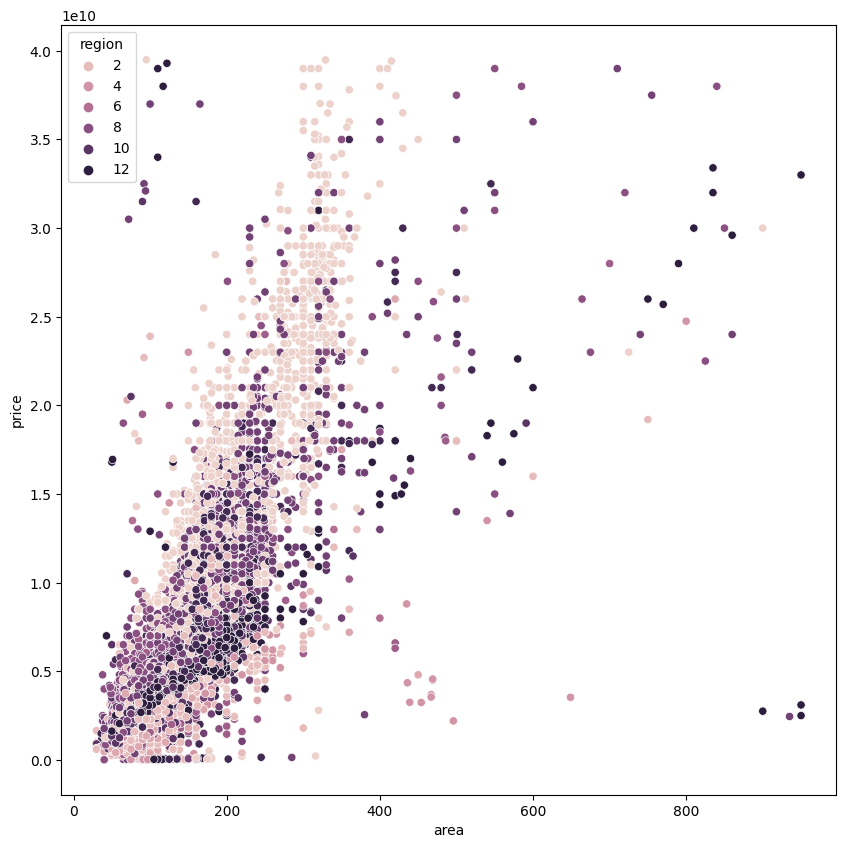

In [1246]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data[data['type']==0], x="area", y="price", hue="region" , legend=True)

<AxesSubplot: xlabel='area', ylabel='price'>

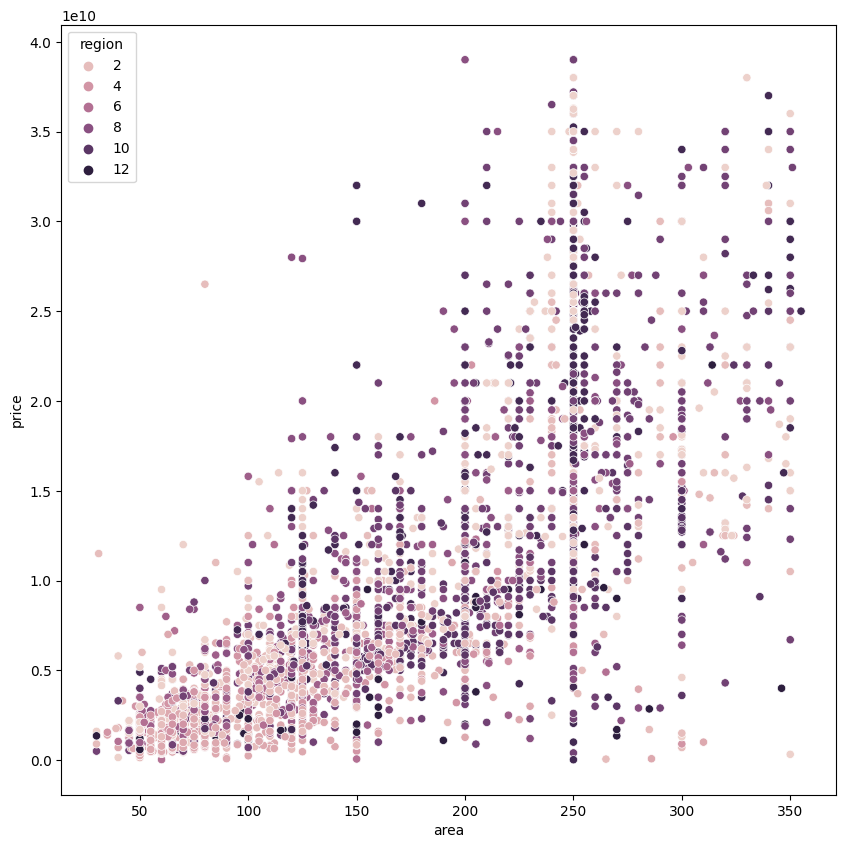

In [1247]:
plt.figure(figsize=(10,10))
sns.scatterplot(data= data[(data['type']==1) &  (data['area'] < data['area'].quantile(0.99)) ] , x="area", y="price", hue="region" , legend=True)

<AxesSubplot: xlabel='age', ylabel='price'>

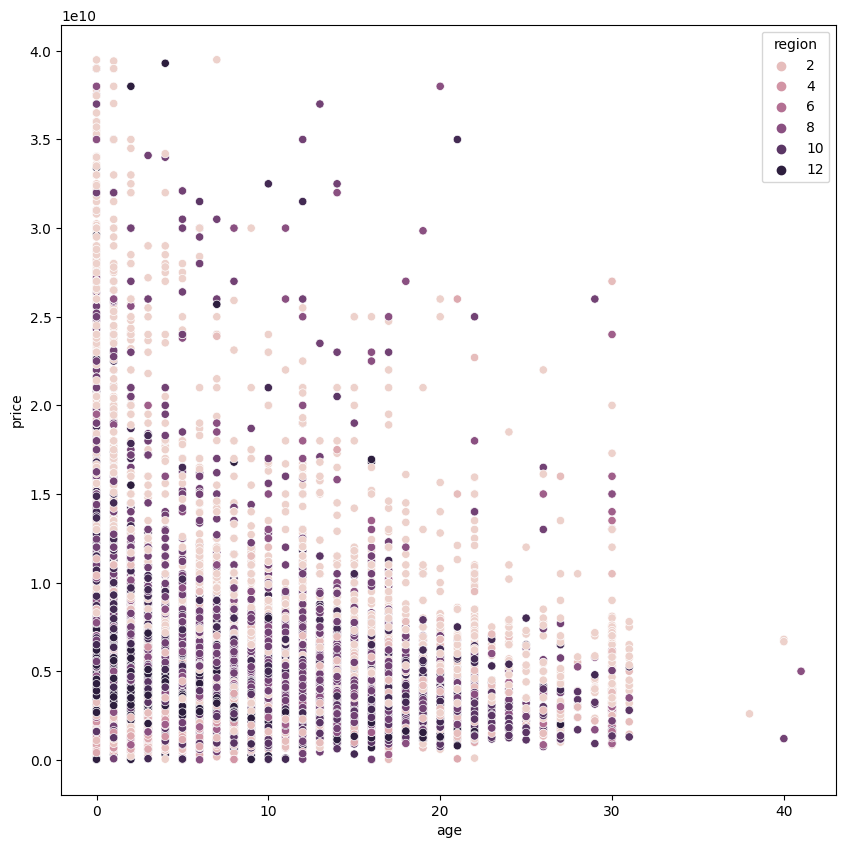

In [1248]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data[data['type']==0], x="age", y="price", hue="region" , legend=True)

<AxesSubplot: xlabel='age', ylabel='price'>

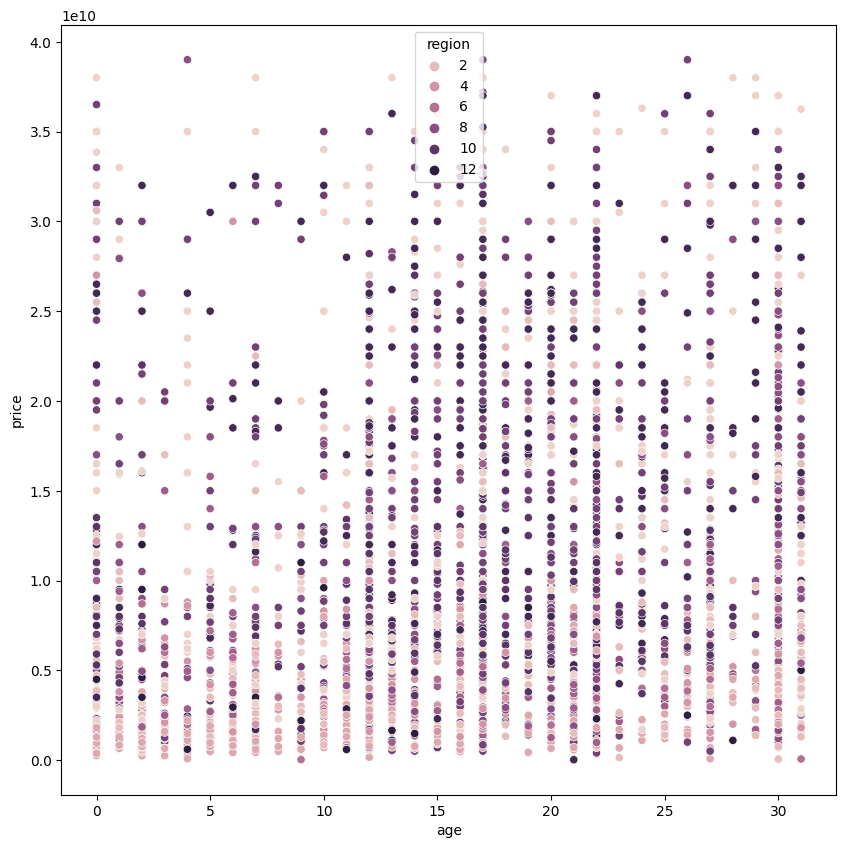

In [1249]:
plt.figure(figsize=(10,10))
sns.scatterplot(data= data[(data['type']==1) &  (data['area'] < data['area'].quantile(0.99)) ] , x="age", y="price", hue="region" , legend=True)

<AxesSubplot: xlabel='floor', ylabel='price'>

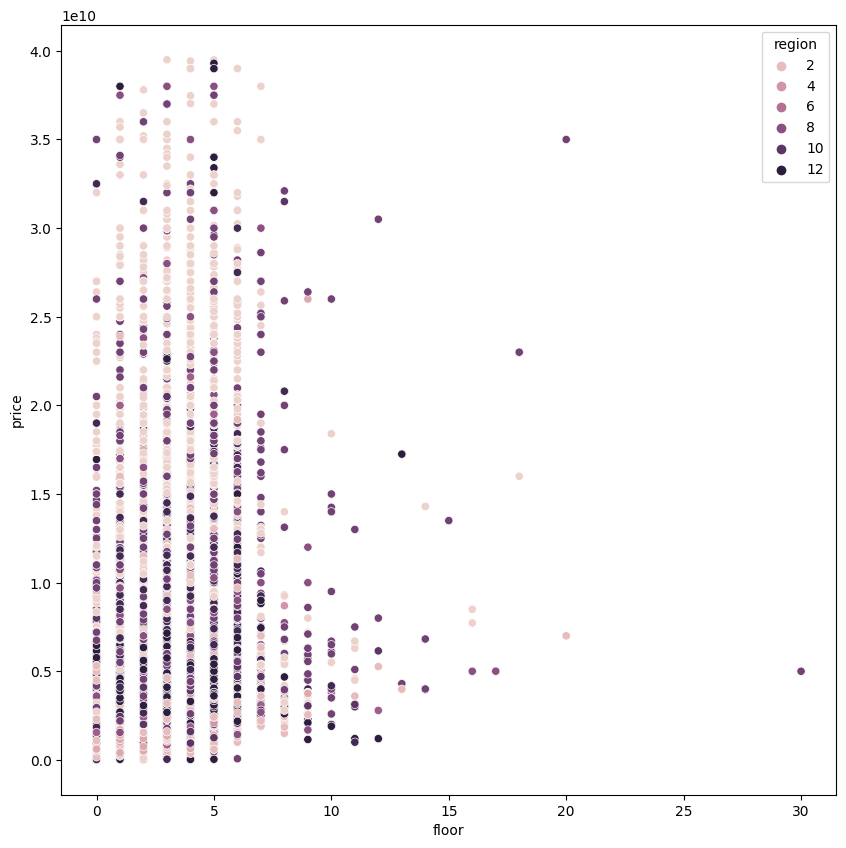

In [1250]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data[data['type']==0], x="floor", y="price", hue="region" , legend=True)

<AxesSubplot: xlabel='floor', ylabel='price'>

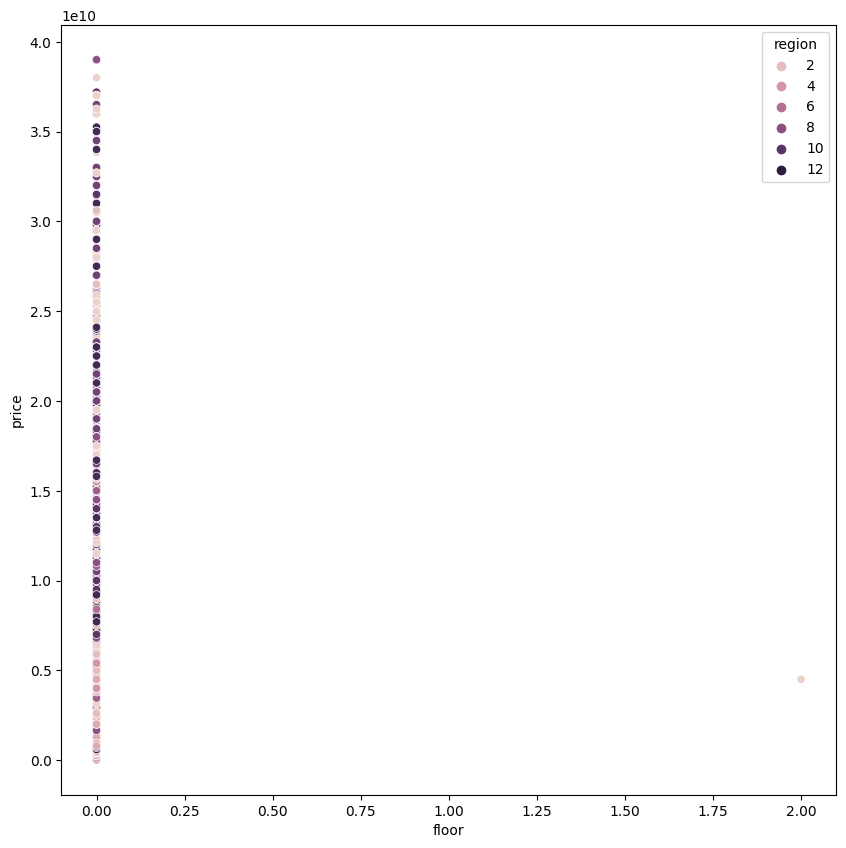

In [1251]:
plt.figure(figsize=(10,10))
sns.scatterplot(data= data[(data['type']==1) &  (data['area'] < data['area'].quantile(0.99)) ] , x="floor", y="price", hue="region" , legend=True)

In [1252]:
corr_matrix = data[(data['type']==1) &  (data['area'] < data['area'].quantile(0.99)) ].corr()
corr_matrix

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3504482291.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data[(data['type']==1) &  (data['area'] < data['area'].quantile(0.99)) ].corr()


,type,area,latitude,longitude,age,floor,bedrooms,price,region,price_meter
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,NaN,1.000000,0.202858,-0.464060,0.173628,-0.012290,0.602735,0.761840,0.273456,0.454799
latitude,NaN,0.202858,1.000000,-0.599376,-0.073895,0.000694,0.083330,0.118271,0.329996,0.029400
longitude,NaN,-0.464060,-0.599376,1.000000,-0.003269,0.003873,-0.314254,-0.436315,-0.590727,-0.356228
age,NaN,0.173628,-0.073895,-0.003269,1.000000,0.021080,0.093454,0.136451,0.016258,0.113730
floor,NaN,-0.012290,0.000694,0.003873,0.021080,1.000000,-0.009401,-0.010272,-0.021219,-0.006134
bedrooms,NaN,0.602735,0.083330,-0.314254,0.093454,-0.009401,1.000000,0.606579,0.157905,0.520863
price,NaN,0.761840,0.118271,-0.436315,0.136451,-0.010272,0.606579,1.000000,0.216976,0.872805
region,NaN,0.273456,0.329996,-0.590727,0.016258,-0.021219,0.157905,0.216976,1.000000,0.169206
price_meter,NaN,0.454799,0.029400,-0.356228,0.113730,-0.006134,0.520863,0.872805,0.169206,1.000000


In [1253]:
def visualization_corrmatrix(feature):
    plt.figure(figsize=(10,5))
    plt.title('Visualize the correlation matrix')
    y=abs(corr_matrix[feature].values)
    plt.bar(corr_matrix[feature].index,y)
    plt.xticks(rotation=90, ha='right')
    plt.show()

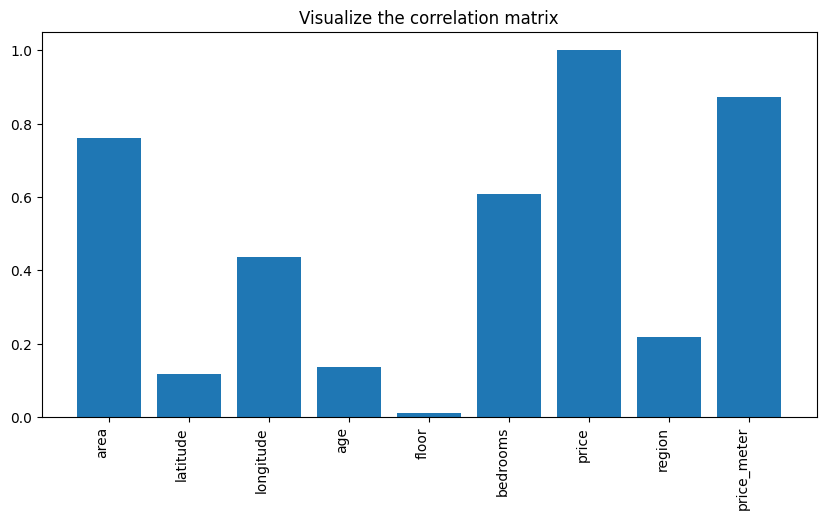

In [1254]:
#feature is price
visualization_corrmatrix('price')

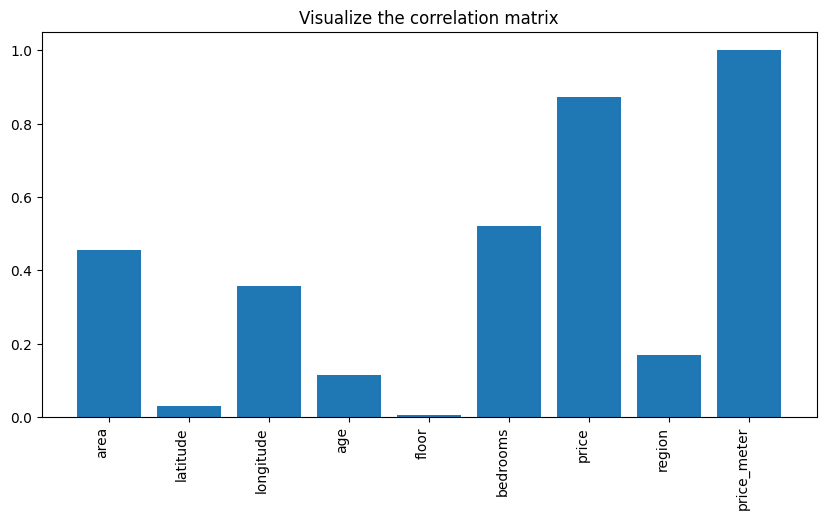

In [1255]:
visualization_corrmatrix('price_meter')

# Model Selection

In [1256]:
def fit_and_evaluate(model, X_train, y_train, X_test, y_test, tolerance=0.2):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # R2 Score
    r2 = r2_score(y_test, y_pred)
    
    # Mean Absolute Percentage Error (MAPE)
    mape= mean_absolute_percentage_error(y_test, y_pred)
    
    #range accuracy
    correct_count = 0
    total_count = len(y_test)

    for true, predicted in zip(y_test, y_pred):
        if abs(true - predicted) <= tolerance*true:
            correct_count += 1

    accuracy = (correct_count / total_count)
    
    #Scatterplot
    plt.scatter(y_test, y_pred)
    plt.show()
    
    return r2, mape , accuracy

In [1257]:
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter
0,0,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0,3.013699e+07
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0,4.800000e+07
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0,2.675000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
44776,0,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0,4.636364e+07
44777,0,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0,3.727273e+07
44778,0,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0,3.928571e+07
44779,0,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0,3.153846e+07


# Extracting advantage from description
 

In [1258]:
data=data.fillna('')

### extract asansor

In [1259]:
data[data.description.str.contains("سانسور دارد")]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter
0,0,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0,3.013699e+07
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0,4.800000e+07
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0,2.675000e+07
6,0,120.0,منطقه 1 محله بعثت خیابان کوهسنگی,آپارتمان متری اکبری خیابان کوهسنگی\r\nکار...,36.287180,59.574720,10.0,4,2.0,5200000000,1.0,4.333333e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
44771,0,160.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متری صفر فرامرز عباسی\r\nاملاک سر...,36.327670,59.548380,0.0,4,3.0,10400000000,2.0,6.500000e+07
44775,0,180.0,منطقه 9 محله هنرستان خیابان کوثر جنوبی,متر نوساز ابتدای کوثر \r\n✅ مجلل ترین ، ب...,36.306322,59.507546,0.0,4,3.0,12000000000,9.0,6.666667e+07
44776,0,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0,4.636364e+07
44777,0,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0,3.727273e+07


In [1260]:
data['asansor']=0
data['asansor'].iloc[data[data.description.str.contains("سانسور دارد")].index]=1
#data['asansor'].iloc[data[data.description.str.contains("سانسور ندارد")].index]=-1

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\2008432954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['asansor'].iloc[data[data.description.str.contains("سانسور دارد")].index]=1


### extract parking

In [1261]:
data[data.description.str.contains("پارکینگ دارد")]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor
0,0,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0,3.013699e+07,1
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0,4.800000e+07,1
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07,1
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0,2.675000e+07,1
5,1,1000.0,منطقه 12 محله الهیه خیابان امیریه,متر چهار فصل داخل مجتمع\r\n☑️چهار فصل خیا...,36.476097,59.407570,6.0,0,4.0,25000000000,12.0,2.500000e+07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44776,0,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0,4.636364e+07,1
44777,0,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0,3.727273e+07,1
44778,0,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0,3.928571e+07,0
44779,0,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0,3.153846e+07,1


In [1262]:
print(data[data.description.str.contains("پارکینگ دارد")]['description'][70])

     متری فول امکانات   خواب سند آماده خ امام رضا
به نام روزی دِه بی منت

با سلام 
قابل توجه خریداران و سرمایه گذاران محترم….

    متر دو خواب 

⚜️فول امکانات⚜️
✅پارکینگ سندی غیر مزاحم
✅انباری سندی  متری
✔️تراس کاربردی
✔️اسانسور

⚜️فایل فوق العاده زیر قیمت جهت خرید سرمایه گذار و مصرف کننده⚜️
⚜️سالن قابل چیدمان هر نوع سلیقه ای⚜️
⚜️دو خواب بزرگ و قابل چیدمان سرویس خواب دو نفره⚜️
⚜️اشپزخانه کابینت چوب⚜️
⚜️کمد دیواری⚜️
⚜️جکوزی⚜️
⚜️تراس کاربردی⚜️
⚜️نورگیر عالی⚜️
⚜️نما مشاعات فوق العاده⚜️
‼️‼️عکسها متعلق به واحد میباشد‼️‼️

♻️قابلیت رهن تا مبلغ    میلیون♻️
مالک فروشنده و آماده عقد قرارداد
سند تک برگ آماده انتقال

‼️فایل را از دست ندهید‼️

جهت بازدید و دریافت بیشتر از واحد تماس حاصل فرمایید 

مشاور تخصصی شما : آرش منشسال ساخت      -    خواب   :                 - طبقه   از   - آسانسور دارد - پارکینگ دارد - انباری دارد - تعداد واحد در طبقه   - سند : تک‌برگ - جهت ساختمان : شمالی -  


In [1263]:
data['parking']=0
data['parking'].iloc[data[data.description.str.contains("پارکینگ دارد")].index]=1
#data['parking'].iloc[data[data.description.str.contains("پارکینگ ندارد")].index]=-1

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\2820668386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['parking'].iloc[data[data.description.str.contains("پارکینگ دارد")].index]=1


In [1264]:
data['parking'].value_counts()

1    36784
0     7997
Name: parking, dtype: int64

### extract anbari

In [1265]:
data[data.description.str.contains("انباری ندارد")]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07,0,0
18,0,105.0,منطقه 7 محله سیدی خیابان کوشش,اپارتمان، متر، دوخواب، قائم\r\nاپارتمان \n...,36.265280,59.609260,0.0,3,2.0,2600000000,7.0,2.476190e+07,1,1
19,0,90.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,آپارتمان متر دو خوابه\r\nاملاک سراسری نیاو...,36.272780,59.602730,0.0,5,2.0,2700000000,8.0,3.000000e+07,1,0
34,0,60.0,منطقه 9 محله رضاشهر خیابان سرافرازان,متر حاشیه بلوارنماز فول امکانات سند دانگ\r...,36.290086,59.502946,8.0,2,1.0,1750000000,9.0,2.916667e+07,1,1
39,0,90.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,آپارتمان متری بازسازی شده مرتب طبقه آسانس...,36.328550,59.513390,12.0,2,2.0,3600000000,11.0,4.000000e+07,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44719,0,71.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متر/ خواب/صفر/حاشیه بزرگراه امام علی شریعتی...,36.360020,59.517400,0.0,4,2.0,1600000000,10.0,2.253521e+07,1,1
44740,0,50.0,منطقه 12 محله الهیه خیابان الهیه,متر/الهیه / میلیون وام/ میلیون رهن/ش...,36.377773,59.472350,18.0,3,1.0,1625000000,12.0,3.250000e+07,0,1
44749,0,60.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,آپارتمان متر دوخوابه صفر نور گیر\r\nآپارتما...,36.351040,59.473766,1.0,5,2.0,1250000000,10.0,2.083333e+07,1,0
44758,0,70.0,منطقه 9 محله هنرستان خیابان هفت تیر,مترچهار واحدی طبقه یک عرصه \r\nتک خواب ن...,36.326736,59.484383,30.0,1,1.0,2200000000,9.0,3.142857e+07,0,0


In [1266]:
print(data[data.description.str.contains("انباری دارد")]['description'][123])

 اپارتمان   متری نبش موسوی  
واحد بسیار خوش نقشه
موقعیت عالی نزدیک به بلوار قرنی
قابلیت تهاتر با باغ در خادر
    متر اپارتمان
طبقه چهار
 واحدی
 خواب
کف پوش
دو عدد کولر ابی
پکیج رادیاتور
حمام مستر
دو تا تراس
کابینت های گلس
اشپزخانه کثیف

دارای یک سوئیت   متری
سند شش دانگ استان قدس

املاک نوایی نبش ابوطالب  
انتها موسوی   سال ساخت      -    خواب   :                  - طبقه   از   - آسانسور دارد - پارکینگ دارد - انباری دارد - تعداد واحد در طبقه   - سند : تک‌برگ - جهت ساختمان : جنوبی -  


In [1267]:
data['anbari']=0
data['anbari'].iloc[data[data.description.str.contains("انباری دارد")].index]=1
#data['anbari'].iloc[data[data.description.str.contains("انباری ندارد")].index]=-1

data['anbari'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\2649234493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['anbari'].iloc[data[data.description.str.contains("انباری دارد")].index]=1


1    37649
0     7132
Name: anbari, dtype: int64

### maghaze

In [1268]:
data[(data.description.str.contains("مغازه")) | (data.description.str.contains("تجاری")) ]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari
26,1,250.0,منطقه 6 محله مصلی خیابان مصلی,مصلی(بنی هاشم) مترتجاری دائم\r\nباسلام \nقو...,36.270720,59.635040,24.0,0,5.0,4000000000,6.0,1.600000e+07,0,1,1
34,0,60.0,منطقه 9 محله رضاشهر خیابان سرافرازان,متر حاشیه بلوارنماز فول امکانات سند دانگ\r...,36.290086,59.502946,8.0,2,1.0,1750000000,9.0,2.916667e+07,1,1,0
58,1,300.0,منطقه 2 محله شهدا خیابان کامیاب,منزل ویلایی ممر حاشیه بلوارمجلسی غربی پشت راه...,36.307830,59.626167,30.0,0,5.0,14800000000,2.0,4.933333e+07,0,1,1
71,1,160.0,منطقه 2 محله شهدا خیابان عبادی,ویلایی شهرستان سرخس جهت معاوضه با مشهد\r\nویل...,36.301770,59.608440,12.0,0,3.0,3500000000,2.0,2.187500e+07,0,1,1
82,1,120.0,منطقه 3 محله گاز خیابان رسالت,دوطبقه متر مناسب دوخانواده\r\nسلام \nامتیا...,36.303140,59.633800,3.0,0,3.0,1790000000,3.0,1.491667e+07,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44650,1,108.0,منطقه 2 محله کوی امیرالمومنین خیابان کوی امیر...,ویلایی با یک مغازه. حاشیه خیابان\r\nفوری فوری...,36.341106,59.577312,23.0,0,2.0,5000000000,2.0,4.629630e+07,0,0,1
44657,1,90.0,منطقه 4 و 5 محله طلاب خیابان مفتح,ویلایی متری سردونبش با مغازه تجاری\r\n✨بنام...,36.296030,59.643700,12.0,0,1.0,4000000000,4.0,4.444444e+07,0,1,1
44679,0,85.0,منطقه 12 محله الهیه خیابان الهیه,* متری شیک*مجیدیه*سند آماده*\r\n✨ مشاورین ام...,36.373776,59.475820,11.0,2,2.0,2700000000,12.0,3.176471e+07,1,1,0
44723,1,500.0,منطقه 6 محله مصلی خیابان مصلی,رستمی مترتجاری دائم سندشش دانگ ملکی\r\n(سن...,36.270720,59.635040,12.0,0,5.0,8500000000,6.0,1.700000e+07,0,1,1


In [1269]:
print(data[(data.description.str.contains("مغازه")) | (data.description.str.contains("تجاری")) ]['description'][58])

 منزل ویلایی ممر حاشیه بلوارمجلسی غربی پشت راه آهن
تراکم سقف
تجاری داده میشود
حاشیه  متر
 ممر
سندملک دانگ تک برگ
مناسب سکونت وساخت
دقیق پشت باغ راه آهن حاشیه بلوار مجلسی غربی اول پل کنارمدرسه زهره
ازداخل ابراهیمی  هم درب داره حاشیه  *  
فقط نقد تهاتر ومشارک داده نمیشود 
بازدید=خرید
قیمت زمین ذکرشده استسال ساخت قبل از      - +   خواب   :                  - پارکینگ دارد - انباری دارد - بالکن دارد -  


In [1270]:
data['maghaze']=0
data['maghaze'].iloc[data[(data.description.str.contains("مغازه")) | (data.description.str.contains("تجاری")) ].index]=1
data['maghaze'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1898959273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['maghaze'].iloc[data[(data.description.str.contains("مغازه")) | (data.description.str.contains("تجاری")) ].index]=1


0    43389
1     1392
Name: maghaze, dtype: int64

In [1271]:
data[data['maghaze']==0]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze
0,0,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0,3.013699e+07,1,1,1,0
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0,4.800000e+07,1,1,1,0
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07,1,1,1,0
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07,0,0,0,0
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0,2.675000e+07,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44776,0,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0,4.636364e+07,1,1,1,0
44777,0,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0,3.727273e+07,1,1,1,0
44778,0,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0,3.928571e+07,0,1,1,0
44779,0,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0,3.153846e+07,1,1,1,0


In [1272]:
print(data[data['maghaze']==0]['description'][0])

   متر امیریه/سند آماده/آسانسور پارکینگ/فول
لوکیشن عالی از لحاظ دسترسی به خدمات رفاهی 
طبقه اول با آسانسور 
  طبقه    واحد 
عکسها واقعی می‌باشد 
 خواب 
سند آماده
تخلیه 
فول امکانات
فروشنده واقعی
تخفیف ویژه پای قرارداد 
فایل شخصیسال ساخت      -    خواب   :                 - طبقه   - آسانسور دارد - پارکینگ دارد - انباری دارد -  


### balkon

In [1273]:
data[data.description.str.contains("تراس")]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0,4.800000e+07,1,1,1,0
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07,1,1,1,0
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0,2.675000e+07,1,1,1,0
12,0,193.0,منطقه 9 محله آب و برق خیابان صیاد شیرازی,آپارتمان متری.بهار.نسترن\r\nفول امکانات\nتک...,36.332341,59.485542,9.0,1,3.0,6200000000,9.0,3.212435e+07,1,1,1,0
14,0,85.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متری فول امکانات حسابی شمالی سر جلو\r\n⭐️⭐️...,36.360020,59.517400,0.0,1,2.0,2900000000,10.0,3.411765e+07,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44762,0,130.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متر با متر حیاط نوساز\r\nبنام...,36.373776,59.475820,0.0,1,2.0,4300000000,12.0,3.307692e+07,1,1,1,0
44763,1,125.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,ویلایی متری دوطبقه مستقل سیدرضی\r\n___کارگ...,36.328550,59.513390,13.0,0,3.0,9200000000,11.0,7.360000e+07,0,1,1,0
44765,0,105.0,منطقه 11 محله دانشجو خیابان صدف,متر/صدف/نوساز/فول امکانات\r\n⚜️⚜️سلام و در...,36.341614,59.493820,1.0,1,2.0,4100000000,11.0,3.904762e+07,1,1,1,0
44770,0,170.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,متری/ تک واحدی /کوهسنگی\r\nسلام و احترام ...,36.272780,59.602730,5.0,1,3.0,9700000000,8.0,5.705882e+07,1,1,1,0


In [1274]:
data['balkon']=0
data['balkon'].iloc[data[data.description.str.contains("بالکن دارد") ].index]=1
#data['balkon'].iloc[data[data.description.str.contains("بالکن ندارد") ].index]=-1
data['balkon'].iloc[data[data.description.str.contains("تراس دارد") ].index]=1
data['balkon'].iloc[data[data.description.str.contains("تراس") ].index]=1
#data['balkon'].iloc[data[data.description.str.contains("تراس ندارد") ].index]=-1
data['balkon'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\119727481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balkon'].iloc[data[data.description.str.contains("بالکن دارد") ].index]=1
C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\119727481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balkon'].iloc[data[data.description.str.contains("تراس دارد") ].index]=1
C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\119727481.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

0    30033
1    14748
Name: balkon, dtype: int64

### full emkanat & shofaz & radiator

In [1275]:
data[(data.description.str.contains("شوفاژ")) | (data.description.str.contains("رادیاتور")) | (data.description.str.contains("فول")) | (data.description.str.contains("پکیج"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon
0,0,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.47582,11.0,1,2.0,2200000000,12.0,3.013699e+07,1,1,1,0,0
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.54838,7.0,1,2.0,4800000000,2.0,4.800000e+07,1,1,1,0,1
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.47582,0.0,0,3.0,5350000000,12.0,2.675000e+07,1,1,1,0,1
5,1,1000.0,منطقه 12 محله الهیه خیابان امیریه,متر چهار فصل داخل مجتمع\r\n☑️چهار فصل خیا...,36.476097,59.40757,6.0,0,4.0,25000000000,12.0,2.500000e+07,0,1,1,0,1
7,0,151.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,تقاطع استادیوسفی حجاب/همکف درب مستقل/بازسازی\...,36.360020,59.51740,15.0,0,2.0,3300000000,10.0,2.185430e+07,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44764,0,95.0,منطقه 3 محله گاز خیابان طبرسی شمالی,متر دو خواب طبرسی فول\r\nنزدیک به ایستگ...,36.323210,59.62739,2.0,3,2.0,1350000000,3.0,1.421053e+07,1,1,1,0,0
44765,0,105.0,منطقه 11 محله دانشجو خیابان صدف,متر/صدف/نوساز/فول امکانات\r\n⚜️⚜️سلام و در...,36.341614,59.49382,1.0,1,2.0,4100000000,11.0,3.904762e+07,1,1,1,0,1
44768,1,145.0,منطقه 8 محله چهارراه لشکر خیابان بلوار امام خ...,ویلایی متری دوبلکس/ دو نبش/ امام خمینی\r...,36.288100,59.60060,1.0,0,2.0,11000000000,8.0,7.586207e+07,0,1,1,0,1
44771,0,160.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متری صفر فرامرز عباسی\r\nاملاک سر...,36.327670,59.54838,0.0,4,3.0,10400000000,2.0,6.500000e+07,1,1,1,0,1


In [1276]:
data['emkanat']=0
data['emkanat'].iloc[data[(data.description.str.contains("شوفاژ")) | (data.description.str.contains("رادیاتور")) | (data.description.str.contains("فول"))].index]=1
data['emkanat'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3954573395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emkanat'].iloc[data[(data.description.str.contains("شوفاژ")) | (data.description.str.contains("رادیاتور")) | (data.description.str.contains("فول"))].index]=1


0    32347
1    12434
Name: emkanat, dtype: int64

In [1277]:
data[data['emkanat']==0]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07,1,1,1,0,1,0
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07,0,0,0,0,0,0
6,0,120.0,منطقه 1 محله بعثت خیابان کوهسنگی,آپارتمان متری اکبری خیابان کوهسنگی\r\nکار...,36.287180,59.574720,10.0,4,2.0,5200000000,1.0,4.333333e+07,1,1,1,0,0,0
8,0,120.0,منطقه 1 محله سجاد خیابان سجاد,( متر - بزرگمهر جنوبی - نوساز )\r\n⚪️️ مش...,36.318036,59.551475,4.0,2,2.0,8500000000,1.0,7.083333e+07,1,1,1,0,0,0
9,0,81.0,منطقه 10 محله قاسم آباد خیابان حجاب,,36.362122,59.521521,23.0,4,1.0,2250000000,10.0,2.777778e+07,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44775,0,180.0,منطقه 9 محله هنرستان خیابان کوثر جنوبی,متر نوساز ابتدای کوثر \r\n✅ مجلل ترین ، ب...,36.306322,59.507546,0.0,4,3.0,12000000000,9.0,6.666667e+07,1,1,1,0,0,0
44776,0,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0,4.636364e+07,1,1,1,0,0,0
44778,0,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0,3.928571e+07,0,1,1,0,0,0
44779,0,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0,3.153846e+07,1,1,1,0,0,0


In [1278]:
print(data[data['emkanat']==0]['description'][44779])

 ((    مــِـتر رَفـیـعـی ))
❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️
❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️
❄️❄️❄️ نـبـش جـنوبی
⚜️ ⚜️ ⚜️ ⚜️                                          
❄️❄️❄️موقعیت گـل رفیعی      ⚜️شـهـرآرا⚜️
⚜️ ⚜️ ⚜️ ⚜️                                          
❄️❄️❄️پـارکیـنگ قید در سـند

❄️❄️❄️دسترسی عالی به بزرگراه و ...
❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️❄️وضعیت واحد : بازسازی شده - سال ساخت      -    خواب   :                 - طبقه   از   - آسانسور دارد - پارکینگ دارد - انباری دارد - تعداد واحد در طبقه   - سند : تک‌برگ - جهت ساختمان : شمالی -  


### parket

In [1279]:
data['parket']=0
data['parket'].iloc[data[(data.description.str.contains("پارکت"))].index]=1
data['parket'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1730612667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['parket'].iloc[data[(data.description.str.contains("پارکت"))].index]=1


0    43226
1     1555
Name: parket, dtype: int64

### seramik

In [1280]:
data['seramik']=0
data['seramik'].iloc[data[(data.description.str.contains("سرامیک"))].index]=1
data['seramik'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1724704319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seramik'].iloc[data[(data.description.str.contains("سرامیک"))].index]=1


0    33160
1    11621
Name: seramik, dtype: int64

### sang

In [1281]:
data[(data.description.str.contains("نما سنگ"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik
14,0,85.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متری فول امکانات حسابی شمالی سر جلو\r\n⭐️⭐️...,36.360020,59.51740,0.0,1,2.0,2900000000,10.0,3.411765e+07,1,1,1,0,1,1,0,1
19,0,90.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,آپارتمان متر دو خوابه\r\nاملاک سراسری نیاو...,36.272780,59.60273,0.0,5,2.0,2700000000,8.0,3.000000e+07,1,0,0,0,1,1,0,1
22,1,127.0,منطقه 11 محله دانشجو خیابان دانشجو,ویلایی متری . عرض . سند شش دانگ . دانشج...,36.331839,59.50351,17.0,0,2.0,6700000000,11.0,5.275591e+07,0,1,1,0,1,0,0,0
29,0,80.0,منطقه 11 محله آزاد شهر خیابان آزادشهر,متر با اسانسور بازسازی شده امامت \r\nکف س...,36.327540,59.52752,12.0,2,2.0,2750000000,11.0,3.437500e+07,1,1,1,0,0,1,0,1
41,0,105.0,منطقه 12 محله الهیه خیابان الهیه,متر / مجیدیه / سند آزاد / خواب نور\r\...,36.373776,59.47582,5.0,4,2.0,3500000000,12.0,3.333333e+07,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44715,0,75.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,آپارتمان متری خواب سیدرضی\r\nآپارتمان متری ...,36.328550,59.51339,16.0,3,2.0,2850000000,11.0,3.800000e+07,0,1,1,0,0,0,0,1
44720,0,128.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,همکف فرامرز عباسی با حیاط اختصاصی\r\n✅با سلام...,36.329080,59.54836,13.0,0,2.0,5300000000,2.0,4.140625e+07,1,1,1,0,0,1,0,1
44722,0,161.0,منطقه 12 محله الهیه خیابان الهیه,حاشیه الهیه متر سنداماده ویو ابدی\r\nحاشی...,36.373776,59.47582,3.0,2,3.0,5100000000,12.0,3.167702e+07,1,1,1,0,0,0,0,0
44734,0,103.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری /سند آماده/خوش نقشه/مناسب خر...,36.373776,59.47582,2.0,3,2.0,3100000000,12.0,3.009709e+07,1,1,1,0,1,1,0,0


In [1282]:
print(data[(data.description.str.contains("سنگ"))]['description'][14])

   متری فول امکانات حسابی شمالی سر جلو
⭐️⭐️به نام خداوند بخشنده مهربان ⭐️⭐️⭐️
⭐️⭐️⭐️⭐️درود فراوان خدمت همشهریان عزیز ⭐️⭐️⭐️⭐️⭐️
↩️↩️↩️ کار گذاری مسکن آسمان هشتم↪️↪️↪️
⭐️ ارادتمندان شما: غمخواه.⭐️
☑️آپارتمان   
☑️ طبقه  
☑️ خواب 
☑️با موقعیت مکانی عالی  ✅ حسابی شمالی
✅شمالی سر جلو
●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●
↩️↩️↩️مشخصات آپارتمان↪️↪️↪️
☑️کابینت : چوب
☑️ کف سرامیک
☑️هود لمسی
☑️شیرالات اهرمی 
☑️نما سنگ 
✅ کاغذ دیواری
✅ آسانسور گلد
✅گاز رو میزی
☑️ انباری وتراس
☑️ پارکینگ 
☑️ موقعیت مکانی عالی حسابی شمالی
●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●
↩️انتخابی ایده آل برای یک زندگی آرام
⭐️ ارادتمندان شما:غمخواه  ⭐️سال ساخت      -    خواب   :                 - طبقه   از   - آسانسور دارد - پارکینگ دارد - انباری دارد - تعداد واحد در طبقه   - سند : تک‌برگ - جهت ساختمان : شمالی -  


In [1283]:
data['sang']=0
data['sang'].iloc[data[(data.description.str.contains("نما سنگ"))].index]=1
data['sang'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1108083231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sang'].iloc[data[(data.description.str.contains("نما سنگ"))].index]=1


0    41234
1     3547
Name: sang, dtype: int64

### roof gargen

In [1284]:
data[(data.description.str.contains("روف"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07,1,1,1,0,1,0,0,0,0
13,0,135.0,منطقه 12 محله الهیه خیابان الهیه,متری اول محمدیه\r\nفروش فوری و زیر قیمت \...,36.373776,59.475820,0.0,1,2.0,4180000000,12.0,3.096296e+07,1,1,1,0,0,0,0,1,0
28,0,165.0,منطقه 1 محله بعثت خیابان احمدآباد,آپارتمان متر احمدآباد\r\nباسلام\nزیربنا ...,36.299350,59.565440,20.0,4,3.0,10000000000,1.0,6.060606e+07,1,1,1,0,0,0,0,0,0
44,0,157.0,منطقه 12 محله الهیه خیابان الهیه,سه خواب *مجلل* اروپایی حاشیه الهیه...,36.373776,59.475820,0.0,6,3.0,5160000000,12.0,3.286624e+07,1,1,1,0,0,0,0,0,0
48,0,145.0,منطقه 9 محله هنرستان خیابان هاشمیه,آپارتمان متری فرشته هاشمیه\r\nدرود و وقت ب...,36.310605,59.504477,0.0,2,3.0,12250000000,9.0,8.448276e+07,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44736,0,210.0,منطقه 9 محله هنرستان خیابان هفت تیر,متری خواب مستر/صارمی/ اقیانوس زیبایی\r\...,36.326480,59.494576,1.0,2,4.0,12000000000,9.0,5.714286e+07,1,1,1,0,0,0,0,1,0
44744,0,161.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,آپارتمان متر/لابی شیک/فول امکانات/ابتدای س...,36.328550,59.513390,1.0,1,3.0,9300000000,11.0,5.776398e+07,1,1,1,0,0,1,0,0,0
44753,0,100.0,منطقه 12 محله الهیه خیابان الهیه,متر رحمانیه واحدی روف گاردن\r\n««بهترین ا...,36.373776,59.475820,0.0,1,2.0,3900000000,12.0,3.900000e+07,1,1,1,0,1,0,0,1,0
44767,0,88.0,منطقه 12 محله الهیه خیابان الهیه,متر / واحدی / روف گاردن\r\n✅بسیار خوش نقشه...,36.373776,59.475820,0.0,3,2.0,2680000000,12.0,3.045455e+07,1,1,1,0,0,0,0,0,0


In [1285]:
print(data[(data.description.str.contains("روف"))]['description'][48])

 آپارتمان    متری فرشته هاشمیه
درود و وقت بخیر

✅آپارتمان    متری  خواب
✅مجموعه  طبقه   واحد
✅طبقه دوم واحد روبه کوچه
✅حمام مستر
✅کف سنگ
✅کابینت چوب
✅پنجره ترمال
✅لابی
✅مشاعات تمام سنگ عباس آباد
✅آسانسور کدینگ
✅روف گاردن
جهت دریافت اطلاعات بیشتر و هماهنگی برای بازدید لطفا تماس بگیرید.
مشاور : مقدمسال ساخت      -    خواب   :                  - طبقه   از   - آسانسور دارد - پارکینگ دارد - انباری دارد - تعداد واحد در طبقه   - سند : تک‌برگ - جهت ساختمان : جنوبی -  


In [1286]:
data['garden']=0
data['garden'].iloc[data[(data.description.str.contains("گاردن"))].index]=1
data['garden'].iloc[data[(data.description.str.contains("رووف"))].index]=1
data['garden'].iloc[data[(data.description.str.contains("رووف"))].index]=1
data['garden'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1634850122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['garden'].iloc[data[(data.description.str.contains("گاردن"))].index]=1
C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1634850122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['garden'].iloc[data[(data.description.str.contains("رووف"))].index]=1
C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1634850122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

0    41971
1     2810
Name: garden, dtype: int64

### jahat

In [1287]:
data[(data.description.str.contains("شمالی"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07,1,1,1,0,1,0,0,0,0,1
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0,2.675000e+07,1,1,1,0,1,1,0,0,0,0
11,0,107.0,منطقه 9 محله آب و برق خیابان صیاد شیرازی,آپارتمان متر/دوخواب/صیاد شیرازی/لادن\r\nب...,36.329693,59.479332,7.0,2,2.0,4850000000,9.0,4.532710e+07,1,1,1,0,0,0,0,1,0,0
14,0,85.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متری فول امکانات حسابی شمالی سر جلو\r\n⭐️⭐️...,36.360020,59.517400,0.0,1,2.0,2900000000,10.0,3.411765e+07,1,1,1,0,1,1,0,1,1,0
15,0,149.0,منطقه 12 محله الهیه خیابان الهیه,معاوضه آپارتمان سه خواب با آپارتمان کوچک\r\nت...,36.380833,59.471390,0.0,4,3.0,5220000000,12.0,3.503356e+07,1,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44772,1,250.0,منطقه 11 محله دانشجو خیابان فارغ التحصیلان,ویلایی٢٨٠ متری/دندانپزشکان/\r\n⚜️مسکن سراسری ...,36.341128,59.470517,18.0,0,5.0,12800000000,11.0,5.120000e+07,0,1,1,0,1,0,0,1,0,0
44775,0,180.0,منطقه 9 محله هنرستان خیابان کوثر جنوبی,متر نوساز ابتدای کوثر \r\n✅ مجلل ترین ، ب...,36.306322,59.507546,0.0,4,3.0,12000000000,9.0,6.666667e+07,1,1,1,0,0,0,0,0,0,1
44777,0,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0,3.727273e+07,1,1,1,0,0,1,0,0,0,0
44779,0,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0,3.153846e+07,1,1,1,0,0,0,0,0,0,0


In [1288]:
print(data[(data.description.str.contains("شمالی"))]['description'][44780])

 آپارتمان    متری دوخواب
   متری 
شمالی
دوخواب
طبقه سوم
موقعیت مکانی عالی 
پارکینگ اختصاصی 
برای مشخصات بیشتر تماس بگیرین 
مشاور شما حیدریسال ساخت      -    خواب   :                 - طبقه   - آسانسور ندارد - پارکینگ دارد - انباری دارد -  


In [1289]:
data['jahat']=0
data['jahat'].iloc[data[(data.description.str.contains("شمالی"))].index]=1
data['jahat'].iloc[data[(data.description.str.contains("جنوبی"))].index]=-1
data['jahat'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3360023828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['jahat'].iloc[data[(data.description.str.contains("شمالی"))].index]=1
C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3360023828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['jahat'].iloc[data[(data.description.str.contains("جنوبی"))].index]=-1


 0    19834
-1    14206
 1    10741
Name: jahat, dtype: int64

### moble

In [1290]:
data[(data.description.str.contains("مبله"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat
35,0,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متری صفر در برج طبقه\r\nآپارتمان در طبق...,36.319780,59.494770,0.0,9,3.0,5600000000,9.0,4.000000e+07,1,1,1,0,0,0,0,1,0,0,1
75,0,175.0,منطقه 11 محله آزاد شهر خیابان آزادشهر,سازه متری بنامجلل در جلال لابی منحصر و دلنش...,36.327540,59.527520,0.0,4,3.0,9200000000,11.0,5.257143e+07,1,1,1,0,0,0,0,0,0,0,0
199,0,120.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان شیک برند\r\nبا سلام \nاپارتمان م...,36.373776,59.475820,1.0,1,2.0,3800000000,12.0,3.166667e+07,1,1,1,0,0,1,0,1,0,1,0
256,0,270.0,منطقه 1 محله سجاد خیابان سجاد,اپارتمان مدرن خوش نقشه\r\n✔️سازه ای مفتخر وبی...,36.318036,59.551475,0.0,4,4.0,19500000000,1.0,7.222222e+07,1,1,1,0,1,0,0,0,0,1,0
262,0,70.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,همکف جنوبی سال ساخت\r\nواحد همکف متر به...,36.326789,59.518125,11.0,0,1.0,5200000000,11.0,7.428571e+07,1,1,0,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44606,0,288.0,منطقه 1 محله سجاد خیابان سجاد,سجاد/ متر/ متر تراس در ارتفاع\r\n⚜️به نام ...,36.318036,59.551475,0.0,6,4.0,24000000000,1.0,8.333333e+07,1,1,1,0,1,0,0,0,0,1,0
44609,0,170.0,منطقه 11 محله آزاد شهر خیابان آزادشهر,اپارتمان جلال سروش قبل فرهنگ متر*مدرن*\r\nب...,36.327540,59.527520,0.0,3,3.0,11550000000,11.0,6.794118e+07,1,1,1,0,1,1,0,0,0,1,0
44672,0,92.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری تهاتر با ماشین\r\nباسلام\n\n...,36.373776,59.475820,0.0,7,2.0,2800000000,12.0,3.043478e+07,1,1,1,0,0,1,0,0,0,0,0
44689,0,68.0,منطقه 3 محله گاز خیابان طبرسی جنوبی,آپارتمان اقامتی با مجوز هتلی مبله\r\nزیر فی م...,36.292694,59.623367,8.0,9,1.0,3750000000,3.0,5.514706e+07,1,1,0,0,0,0,0,0,0,0,0


In [1291]:
print(data[(data.description.str.contains("مبله"))]['description'][44672])

 آپارتمان    متری تهاتر با ماشین
باسلام

واحد آپارتمان    متری

طبقه   

بلوک  

برج نسیم در عصمتیه

واحد فول امکانات مبله

نقدی و قابل تهاتر با ماشین

با تشکرانباری دارد -    خواب   :                 - طبقه   - آسانسور دارد - پارکینگ دارد - سال ساخت      -  


In [1292]:
data['moble']=0
data['moble'].iloc[data[(data.description.str.contains("مبله"))].index]=1
data['moble'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\2875685451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moble'].iloc[data[(data.description.str.contains("مبله"))].index]=1


0    44134
1      647
Name: moble, dtype: int64

### bazsazi 

In [1293]:
data[(data.description.str.contains("بازسازی"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble
7,0,151.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,تقاطع استادیوسفی حجاب/همکف درب مستقل/بازسازی\...,36.360020,59.517400,15.0,0,2.0,3300000000,10.0,2.185430e+07,0,1,1,0,0,1,0,0,0,0,0,0
11,0,107.0,منطقه 9 محله آب و برق خیابان صیاد شیرازی,آپارتمان متر/دوخواب/صیاد شیرازی/لادن\r\nب...,36.329693,59.479332,7.0,2,2.0,4850000000,9.0,4.532710e+07,1,1,1,0,0,0,0,1,0,0,1,0
17,1,60.0,منطقه 9 محله رضاشهر خیابان رضاشهر,ویلایی متر زمین متربنا\r\nخانه سوبلکس ...,36.291030,59.537860,2.0,0,2.0,4900000000,9.0,8.166667e+07,0,1,1,0,1,0,0,0,0,0,-1,0
18,0,105.0,منطقه 7 محله سیدی خیابان کوشش,اپارتمان، متر، دوخواب، قائم\r\nاپارتمان \n...,36.265280,59.609260,0.0,3,2.0,2600000000,7.0,2.476190e+07,1,1,0,0,0,0,0,1,0,0,1,0
21,0,100.0,منطقه 2 محله هدایت خیابان عبدالمطلب,آپارتمان متر .اول.عبدالمطلب\r\nطبقه اول رو...,36.317990,59.607300,7.0,1,2.0,2800000000,2.0,2.800000e+07,0,0,1,0,0,0,0,1,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44763,1,125.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,ویلایی متری دوطبقه مستقل سیدرضی\r\n___کارگ...,36.328550,59.513390,13.0,0,3.0,9200000000,11.0,7.360000e+07,0,1,1,0,1,0,0,1,0,0,0,0
44768,1,145.0,منطقه 8 محله چهارراه لشکر خیابان بلوار امام خ...,ویلایی متری دوبلکس/ دو نبش/ امام خمینی\r...,36.288100,59.600600,1.0,0,2.0,11000000000,8.0,7.586207e+07,0,1,1,0,1,1,0,0,0,0,0,0
44773,0,80.0,منطقه 2 محله هدایت خیابان مطهری شمالی,آپارتمان واقع در هدایت یک خواب\r\nآپارتمان ...,36.316310,59.608390,10.0,3,1.0,1590000000,2.0,1.987500e+07,0,0,1,0,0,0,0,1,0,0,-1,0
44778,0,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0,3.928571e+07,0,1,1,0,0,0,0,1,0,0,0,0


In [1294]:
data['bazsazi']=0
data['bazsazi'].iloc[data[(data.description.str.contains("بازسازی"))].index]=1
data['bazsazi'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\2191808009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bazsazi'].iloc[data[(data.description.str.contains("بازسازی"))].index]=1


0    33278
1    11503
Name: bazsazi, dtype: int64

### komod

In [1295]:
data[(data.description.str.contains("کمد"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07,0,0,0,0,0,0,0,1,0,0,0,0,0
11,0,107.0,منطقه 9 محله آب و برق خیابان صیاد شیرازی,آپارتمان متر/دوخواب/صیاد شیرازی/لادن\r\nب...,36.329693,59.479332,7.0,2,2.0,4850000000,9.0,4.532710e+07,1,1,1,0,0,0,0,1,0,0,1,0,1
19,0,90.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,آپارتمان متر دو خوابه\r\nاملاک سراسری نیاو...,36.272780,59.602730,0.0,5,2.0,2700000000,8.0,3.000000e+07,1,0,0,0,1,1,0,1,1,0,-1,0,0
21,0,100.0,منطقه 2 محله هدایت خیابان عبدالمطلب,آپارتمان متر .اول.عبدالمطلب\r\nطبقه اول رو...,36.317990,59.607300,7.0,1,2.0,2800000000,2.0,2.800000e+07,0,0,1,0,0,0,0,1,0,0,-1,0,1
27,0,83.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متری ( دوممر ) واحدی\r\n❤️بنام خدا❤...,36.360020,59.517400,14.0,2,2.0,2430000000,10.0,2.927711e+07,0,1,1,0,0,0,0,0,0,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44765,0,105.0,منطقه 11 محله دانشجو خیابان صدف,متر/صدف/نوساز/فول امکانات\r\n⚜️⚜️سلام و در...,36.341614,59.493820,1.0,1,2.0,4100000000,11.0,3.904762e+07,1,1,1,0,1,1,0,1,0,0,0,0,0
44767,0,88.0,منطقه 12 محله الهیه خیابان الهیه,متر / واحدی / روف گاردن\r\n✅بسیار خوش نقشه...,36.373776,59.475820,0.0,3,2.0,2680000000,12.0,3.045455e+07,1,1,1,0,0,0,0,0,0,1,0,0,0
44769,0,91.0,منطقه 12 محله الهیه خیابان الهیه,متر سه نبش رحمانیه تخلیه سند اماده\r\nEhs...,36.373776,59.475820,7.0,3,2.0,3200000000,12.0,3.516484e+07,1,1,1,0,0,0,0,1,0,0,0,0,0
44772,1,250.0,منطقه 11 محله دانشجو خیابان فارغ التحصیلان,ویلایی٢٨٠ متری/دندانپزشکان/\r\n⚜️مسکن سراسری ...,36.341128,59.470517,18.0,0,5.0,12800000000,11.0,5.120000e+07,0,1,1,0,1,0,0,1,0,0,1,0,0


In [1296]:
data['komod']=0
data['komod'].iloc[data[(data.description.str.contains("کمد"))].index]=1
data['komod'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\547816548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['komod'].iloc[data[(data.description.str.contains("کمد"))].index]=1


0    34897
1     9884
Name: komod, dtype: int64

### em_mos

In [1297]:
data[(data.description.str.contains("امتیازات مستقل"))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi,komod
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07,0,0,0,0,0,0,0,1,0,0,0,0,0,1
21,0,100.0,منطقه 2 محله هدایت خیابان عبدالمطلب,آپارتمان متر .اول.عبدالمطلب\r\nطبقه اول رو...,36.317990,59.607300,7.0,1,2.0,2800000000,2.0,2.800000e+07,0,0,1,0,0,0,0,1,0,0,-1,0,1,1
73,0,60.0,منطقه 9 محله رضاشهر خیابان سرافرازان,اپارتمان متری حق شناس\r\nسرامیک ام دی اف تخل...,36.290086,59.502946,14.0,1,1.0,1600000000,9.0,2.666667e+07,0,0,0,0,0,0,0,1,0,0,-1,0,1,0
117,0,140.0,منطقه 2 محله هدایت خیابان ایثارگران,متر دوبلکس صفر خواب\r\nآپارتمان فوق صفر\nب...,36.326877,59.619993,0.0,3,2.0,1450000000,2.0,1.035714e+07,0,0,1,0,0,0,0,1,0,0,0,0,0,1
141,0,95.0,منطقه 2 محله کوی امیرالمومنین خیابان کوی امیر...,متر سنددار خیام \r\n///______________امل...,36.341250,59.571770,5.0,4,2.0,2850000000,2.0,3.000000e+07,1,1,1,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44539,0,90.0,منطقه 2 محله هدایت خیابان عبدالمطلب,اپارتمان متر.همکف.عبدالمطلب.هنرور\r\nیک واح...,36.317990,59.607300,6.0,0,2.0,2100000000,2.0,2.333333e+07,1,0,1,0,0,1,0,1,0,0,-1,0,1,1
44635,0,100.0,منطقه 2 محله هدایت خیابان موسوی قوچانی,آپارتمان متر\r\nتک واحدی. امتیازات مستقل\...,36.325810,59.586920,9.0,0,1.0,1950000000,2.0,1.950000e+07,0,0,1,0,0,0,0,1,0,0,0,0,0,0
44659,0,95.0,منطقه 2 محله هدایت خیابان مطهری شمالی,اپارتمان متر اسانسور مطهری هدایت ایثارگران...,36.316310,59.608390,3.0,4,2.0,2650000000,2.0,2.789474e+07,1,0,1,0,0,0,1,0,0,0,0,0,0,0
44692,0,75.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,عبادی هم کف متری تمیز\r\n༺همه ما خادم الرض...,36.272780,59.602730,3.0,0,2.0,1580000000,8.0,2.106667e+07,1,0,1,0,0,0,0,0,0,0,-1,0,1,0


In [1298]:
data['em_mos']=0
data['em_mos'].iloc[data[(data.description.str.contains("امتیازات مستقل"))].index]=1
data['em_mos'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\875209970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['em_mos'].iloc[data[(data.description.str.contains("امتیازات مستقل"))].index]=1


0    44062
1      719
Name: em_mos, dtype: int64

###  naghashi

In [1299]:
data[(data.description.str.contains("کاغذ دیواری")) | (data.description.str.contains("نقاشی شده")) ]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi,komod,em_mos
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
14,0,85.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متری فول امکانات حسابی شمالی سر جلو\r\n⭐️⭐️...,36.360020,59.517400,0.0,1,2.0,2900000000,10.0,3.411765e+07,1,1,1,0,1,1,0,1,1,0,1,0,0,0,0
19,0,90.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,آپارتمان متر دو خوابه\r\nاملاک سراسری نیاو...,36.272780,59.602730,0.0,5,2.0,2700000000,8.0,3.000000e+07,1,0,0,0,1,1,0,1,1,0,-1,0,0,1,0
28,0,165.0,منطقه 1 محله بعثت خیابان احمدآباد,آپارتمان متر احمدآباد\r\nباسلام\nزیربنا ...,36.299350,59.565440,20.0,4,3.0,10000000000,1.0,6.060606e+07,1,1,1,0,0,0,0,0,0,1,-1,0,0,0,0
31,0,110.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متری شیک و تمیز حجاب\r\nکارگزاری املاک شار...,36.360020,59.517400,4.0,4,2.0,1900000000,10.0,1.727273e+07,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44731,0,110.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان اوایل رحمانیه ، متری شیک\r\n⚜️ ب...,36.365387,59.474815,4.0,4,2.0,4400000000,12.0,4.000000e+07,1,1,1,1,0,0,0,1,0,0,-1,0,0,1,0
44749,0,60.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,آپارتمان متر دوخوابه صفر نور گیر\r\nآپارتما...,36.351040,59.473766,1.0,5,2.0,1250000000,10.0,2.083333e+07,1,0,0,0,0,0,0,1,0,0,-1,0,0,0,0
44751,0,100.0,منطقه 7 محله سیدی خیابان کوشش,آپارتمان متری خیابان قایم\r\nآپارتمان ...,36.265280,59.609260,16.0,0,1.0,1550000000,7.0,1.550000e+07,0,0,1,0,0,0,0,1,0,0,-1,0,1,1,0
44765,0,105.0,منطقه 11 محله دانشجو خیابان صدف,متر/صدف/نوساز/فول امکانات\r\n⚜️⚜️سلام و در...,36.341614,59.493820,1.0,1,2.0,4100000000,11.0,3.904762e+07,1,1,1,0,1,1,0,1,0,0,0,0,0,1,0


In [1300]:
data['naghashi']=0
data['naghashi'].iloc[data[(data.description.str.contains("کاغذ دیواری")) | (data.description.str.contains("نقاشی شده")) ].index]=1
data['naghashi'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1035943547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['naghashi'].iloc[data[(data.description.str.contains("کاغذ دیواری")) | (data.description.str.contains("نقاشی شده")) ].index]=1


0    40930
1     3851
Name: naghashi, dtype: int64

### extract sanad

There are 5 types of sanad.
0. There is no mention of having a sanad
1. It is directly stated that it has a sanad
2. It is a promise
3. Other
4. It is sanad, but it is said that it is not correct 

In [1301]:
data[data.description.str.contains("قول نامه")]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi,komod,em_mos,naghashi
674,0,85.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,آپارتمان متری فجر قاسم آباد\r\n باسلام و ...,36.360020,59.517400,7.0,2,2.0,2700000000,10.0,3.176471e+07,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1887,0,135.0,منطقه 2 محله فرامرز عباسی خیابان جانباز,آپارتمان متری سرجلو\r\nبا سلام و احترام\n☆...,36.335880,59.557710,0.0,6,2.0,3375000000,2.0,2.500000e+07,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2502,0,90.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,اپارتمان متری/غرق نور/خیابان ثمانه/فول\r\nبا...,36.327670,59.548380,8.0,2,2.0,4150000000,2.0,4.611111e+07,0,1,1,0,0,1,0,0,0,0,-1,1,1,0,0,0
2643,0,60.0,منطقه 12 محله الهیه خیابان الهیه,متر حاشیه اصلی ««زشک زیبا »»\r\nبا سلام \n ...,36.373776,59.475820,7.0,1,1.0,1100000000,12.0,1.833333e+07,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2800,0,94.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,آپارتمان متری فجر قاسم آباد\r\nبا سلام و...,36.360020,59.517400,0.0,9,2.0,3050000000,10.0,3.244681e+07,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41321,0,105.0,منطقه 7 محله سیدی خیابان کوشش,آپارتمان متر\r\nآپارتمان در سحر \n✅ دس...,36.265280,59.609260,13.0,1,1.0,1850000000,7.0,1.761905e+07,0,0,0,0,0,0,0,1,0,0,-1,0,1,0,0,0
41547,1,55.0,منطقه 3 محله گاز خیابان رسالت,منزل ویلایی دربست متری در طبقه نیم\r\nبا سلا...,36.303140,59.633800,0.0,0,1.0,1278000000,3.0,2.323636e+07,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
42608,0,260.0,منطقه 1 محله بعثت خیابان رضا,رضاشهر متر خواب کار قوی\r\n متری \nت...,36.291085,59.565186,0.0,1,4.0,15600000000,1.0,6.000000e+07,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0
42870,0,108.0,منطقه 2 محله فرامرز عباسی خیابان جانباز,آپارتمان متری تک واحدی نورگیر\r\nبا سلام و ...,36.335880,59.557710,0.0,3,2.0,2530000000,2.0,2.342593e+07,1,1,1,0,0,0,0,0,0,0,-1,0,0,0,0,0


In [1302]:
print(data[data.description.str.contains('قول نامه ای')]['description'][2643])

   متر حاشیه اصلی ««زشک زیبا »»
با سلام 
            ⚜️ یک واحد آپارتمان در زشک⚜️
⚜️شمال را با زشک تجربه کنید 
⚜️ فرصتی استثنایی برای سرمایه گذاری در زشک 
⚜️ چشم انداز فوق‌العاده زیبا و دیدنی نورگیر عالی.
⚜️متراژ بنا:  
⚜️تعداد خواب: 
⚜️گرمایش:بخاری
⚜️سرمایش:کولر
⚜️ امتیازات:آب برق گاز 
⚜️سند: قول نامه ای تاییدیه دهیاری هم داره 
⚜️قیمت: متری   م
مشاور شما :علی نیا 
موارد بیشمار با سلیقه و بودجه شما موجود می‌باشد 
______________________________________________
                                خرید فروش 
   زمین باغ ویلا برای سرمایه گذاری در زشک 
جهت دیدن موارد بیشتر پیام دهید تا عضو شوید 
       
                            سایشک املاکسال ساخت      -    خواب   :                 - طبقه   - آسانسور دارد - پارکینگ دارد - انباری دارد -  


In [1303]:
data[data.description.str.contains("سند : سایر")]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi,komod,em_mos,naghashi
17,1,60.0,منطقه 9 محله رضاشهر خیابان رضاشهر,ویلایی متر زمین متربنا\r\nخانه سوبلکس ...,36.291030,59.537860,2.0,0,2.0,4900000000,9.0,8.166667e+07,0,1,1,0,1,0,0,0,0,0,-1,0,1,0,0,0
18,0,105.0,منطقه 7 محله سیدی خیابان کوشش,اپارتمان، متر، دوخواب، قائم\r\nاپارتمان \n...,36.265280,59.609260,0.0,3,2.0,2600000000,7.0,2.476190e+07,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
62,0,105.0,منطقه 12 محله الهیه خیابان امیریه,متر/ واحدی/رو‌به افتاب\r\n◼️◾️▪️مسکن‌شهرمش...,36.390412,59.474457,0.0,4,2.0,3700000000,12.0,3.523810e+07,1,1,1,0,0,0,0,0,0,0,-1,0,0,0,0,0
73,0,60.0,منطقه 9 محله رضاشهر خیابان سرافرازان,اپارتمان متری حق شناس\r\nسرامیک ام دی اف تخل...,36.290086,59.502946,14.0,1,1.0,1600000000,9.0,2.666667e+07,0,0,0,0,0,0,0,1,0,0,-1,0,1,0,1,0
90,0,95.0,منطقه 12 محله الهیه خیابان امیریه,متری امیریه\r\nمجتمع آرام خلیج فارس\nرو به...,36.380667,59.484676,8.0,7,2.0,2100000000,12.0,2.210526e+07,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44536,0,125.0,منطقه 2 محله شهدا خیابان عبادی,آپارتمان متری\r\nخانه ویلایی دو طبقه طبقه...,36.301770,59.608440,20.0,0,2.0,2500000000,2.0,2.000000e+07,0,1,0,0,0,0,0,0,0,0,-1,0,0,0,0,0
44573,1,60.0,منطقه 1 محله بعثت خیابان رضا,سوبلکس متری متر بنا\r\nسند وکالتی \nصفر...,36.291085,59.565186,3.0,0,2.0,4150000000,1.0,6.916667e+07,0,1,1,0,1,0,0,0,0,0,-1,0,1,0,0,0
44645,0,140.0,منطقه 12 محله الهیه خیابان الهیه,متری برند\r\nسلام\nباسلام\n⚜️ مسکن نشانی⚜️...,36.373776,59.475820,0.0,6,3.0,4060000000,12.0,2.900000e+07,1,1,1,0,0,0,0,0,0,0,-1,0,0,0,0,0
44669,0,110.0,منطقه 2 محله هدایت خیابان هنرور,فروش آپارتمان متر وکالتی یک سال ساخت یاس ...,36.323220,59.606620,1.0,4,2.0,2800000000,2.0,2.545455e+07,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1


In [1304]:
print(data[data.description.str.contains("قولنامه")]['description'][44730])

    متر حیاط دارد/معاوضه با ویلایی/ با قولنامه واگذار میگردد 


In [1305]:
data[data.description.str.contains(('سند تک'))]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi,komod,em_mos,naghashi
16,0,160.0,منطقه 11 محله دانشجو خیابان فارغ التحصیلان,آپارتمان متری دو معبر دندانپزشکان\r\nبا س...,36.341128,59.470517,0.0,5,3.0,9250000000,11.0,5.781250e+07,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
64,0,137.0,منطقه 7 محله 17 شهریور خیابان هفده شهریور,آپارتمان متری / فول امکانات / شهید سالم\r...,36.276045,59.617282,1.0,5,3.0,6165000000,7.0,4.500000e+07,1,1,1,0,1,1,0,1,0,0,-1,0,0,1,0,0
70,0,125.0,منطقه 8 محله چهارراه لشکر خیابان امام رضا,متری فول امکانات خواب سند آماده خ امام ...,36.272780,59.602730,3.0,2,2.0,6700000000,8.0,5.360000e+07,1,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0
81,0,76.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,آپارتمان . متر . دوخوابه . طبقه اول\r\nبه ...,36.360020,59.517400,16.0,1,2.0,2530000000,10.0,3.328947e+07,0,1,1,0,1,0,0,1,0,0,-1,0,1,1,0,1
159,0,149.0,منطقه 9 محله آب و برق خیابان برونسی,اپارتمان متر صفر جنوبی سند تک برگ وکیل ابا...,36.326765,59.463926,0.0,3,3.0,7500000000,9.0,5.033557e+07,1,1,1,0,0,0,0,0,0,0,-1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,0,102.0,منطقه 12 محله الهیه خیابان امیریه,آپارتمان متری فول بازسازی شده\r\nمرکز تخصص...,36.377310,59.484860,7.0,4,2.0,3300000000,12.0,3.235294e+07,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
44719,0,71.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متر/ خواب/صفر/حاشیه بزرگراه امام علی شریعتی...,36.360020,59.517400,0.0,4,2.0,1600000000,10.0,2.253521e+07,1,1,0,0,1,1,0,1,0,0,-1,0,0,0,0,0
44726,0,85.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,متری/خوش نقشه/اوایل حسابی/طبقه آسانسوردار\...,36.360020,59.517400,8.0,4,2.0,2600000000,10.0,3.058824e+07,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
44731,0,110.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان اوایل رحمانیه ، متری شیک\r\n⚜️ ب...,36.365387,59.474815,4.0,4,2.0,4400000000,12.0,4.000000e+07,1,1,1,1,0,0,0,1,0,0,-1,0,0,1,0,1


In [1306]:
print(data[~data.description.str.contains(('سند'))]['description'][44780])

 آپارتمان    متری دوخواب
   متری 
شمالی
دوخواب
طبقه سوم
موقعیت مکانی عالی 
پارکینگ اختصاصی 
برای مشخصات بیشتر تماس بگیرین 
مشاور شما حیدریسال ساخت      -    خواب   :                 - طبقه   - آسانسور ندارد - پارکینگ دارد - انباری دارد -  


In [1307]:
data['sanad']=0
data['sanad'].iloc[data[data.description.str.contains('سند')].index]=1
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1203139762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('سند')].index]=1


1    30351
0    14430
Name: sanad, dtype: int64

In [1308]:
data['sanad'].iloc[data[data.description.str.contains('سند آماده')].index]=1
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3904466878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('سند آماده')].index]=1


1    30351
0    14430
Name: sanad, dtype: int64

In [1309]:
data['sanad'].iloc[data[data.description.str.contains('سند اماده')].index]=1
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\61904609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('سند اماده')].index]=1


1    30351
0    14430
Name: sanad, dtype: int64

In [1310]:
data['sanad'].iloc[data[data.description.str.contains('تک‌برگ')].index]=1
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3545447102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('تک‌برگ')].index]=1


1    30351
0    14430
Name: sanad, dtype: int64

In [1311]:
data['sanad'].iloc[data[data.description.str.contains('سند تک')].index]=1
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3333683427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('سند تک')].index]=1


1    30351
0    14430
Name: sanad, dtype: int64

In [1312]:
data['sanad'].iloc[data[data.description.str.contains("قول نامه ای")].index]=2
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\593850710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains("قول نامه ای")].index]=2


1    30334
0    14429
2       18
Name: sanad, dtype: int64

In [1313]:
data['sanad'].iloc[data[data.description.str.contains("قول نامه")].index]=2
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3352299132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains("قول نامه")].index]=2


1    30284
0    14427
2       70
Name: sanad, dtype: int64

In [1314]:
data['sanad'].iloc[data[data.description.str.contains("قولنامه")].index]=2
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1984708968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains("قولنامه")].index]=2


1    28740
0    13901
2     2140
Name: sanad, dtype: int64

In [1315]:
data['sanad'].iloc[data[data.description.str.contains("قولنامه‌ای")].index]=2
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1446660439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains("قولنامه‌ای")].index]=2


1    28740
0    13901
2     2140
Name: sanad, dtype: int64

In [1316]:
data['sanad'].iloc[data[data.description.str.contains("قول‌نامه‌ای")].index]=2
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1276819172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains("قول‌نامه‌ای")].index]=2


1    26501
0    13901
2     4379
Name: sanad, dtype: int64

In [1317]:
data['sanad'].iloc[data[data.description.str.contains('سند تک‌برگ')].index]=1
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\228777837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('سند تک‌برگ')].index]=1


1    26501
0    13901
2     4379
Name: sanad, dtype: int64

In [1318]:
data['sanad'].iloc[data[data.description.str.contains('سند‌تک‌برگ')].index]=1
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\1590634441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('سند‌تک‌برگ')].index]=1


1    26501
0    13901
2     4379
Name: sanad, dtype: int64

In [1319]:
data['sanad'].iloc[data[data.description.str.contains('سند : سایر')].index]=3
data['sanad'].value_counts()

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\3541898348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sanad'].iloc[data[data.description.str.contains('سند : سایر')].index]=3


1    25567
0    13901
2     4278
3     1035
Name: sanad, dtype: int64

In [1320]:
data[data['sanad']==0]

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi,komod,em_mos,naghashi,sanad
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0,4.800000e+07,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
7,0,151.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,تقاطع استادیوسفی حجاب/همکف درب مستقل/بازسازی\...,36.360020,59.517400,15.0,0,2.0,3300000000,10.0,2.185430e+07,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9,0,81.0,منطقه 10 محله قاسم آباد خیابان حجاب,,36.362122,59.521521,23.0,4,1.0,2250000000,10.0,2.777778e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,86.0,منطقه 12 محله الهیه خیابان اقدسیه,,36.377129,59.480647,10.0,1,2.0,2500000000,12.0,2.906977e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,193.0,منطقه 9 محله آب و برق خیابان صیاد شیرازی,آپارتمان متری.بهار.نسترن\r\nفول امکانات\nتک...,36.332341,59.485542,9.0,1,3.0,6200000000,9.0,3.212435e+07,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44766,0,85.0,منطقه 2 محله هدایت خیابان عبدالمطلب,,36.317990,59.607300,11.0,0,2.0,2300000000,2.0,2.705882e+07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44767,0,88.0,منطقه 12 محله الهیه خیابان الهیه,متر / واحدی / روف گاردن\r\n✅بسیار خوش نقشه...,36.373776,59.475820,0.0,3,2.0,2680000000,12.0,3.045455e+07,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
44771,0,160.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متری صفر فرامرز عباسی\r\nاملاک سر...,36.327670,59.548380,0.0,4,3.0,10400000000,2.0,6.500000e+07,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0
44776,0,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0,4.636364e+07,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1321]:
data

,type,area,neighborhood,description,latitude,longitude,age,floor,bedrooms,price,region,price_meter,asansor,parking,anbari,maghaze,balkon,emkanat,parket,seramik,sang,garden,jahat,moble,bazsazi,komod,em_mos,naghashi,sanad
0,0,73.0,منطقه 12 محله الهیه خیابان الهیه,متر امیریه/سند آماده/آسانسور پارکینگ/فول\r\...,36.373776,59.475820,11.0,1,2.0,2200000000,12.0,3.013699e+07,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,100.0,منطقه 2 محله فرامرز عباسی خیابان فرامرز عباسی,آپارتمان متر/فول/خوش نقشه/فرامرز\r\nباسلام\...,36.327670,59.548380,7.0,1,2.0,4800000000,2.0,4.800000e+07,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,140.0,منطقه 9 محله هنرستان خیابان هاشمیه,متر در هاشمیه\r\n⚜️⚜️⚜️کارگزاری املاک هورا...,36.310605,59.504477,0.0,2,2.0,10200000000,9.0,7.285714e+07,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1
3,0,65.0,منطقه 12 محله الهیه خیابان الهیه,آپارتمان متری ویرانی \r\nسلام آپارتمان ...,36.400540,59.388382,6.0,4,1.0,870000000,12.0,1.338462e+07,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,2
4,0,200.0,منطقه 12 محله الهیه خیابان الهیه,/ متر*همکف*فول* مترحیاط باامکانات کامل\r\...,36.373776,59.475820,0.0,0,3.0,5350000000,12.0,2.675000e+07,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44776,0,110.0,منطقه 11 محله آزاد شهر خیابان فرهنگ,متر / حاشیه فرهنگ / سال ساخت\r\nباسلام\nم...,36.328550,59.513390,4.0,4,2.0,5100000000,11.0,4.636364e+07,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
44777,0,110.0,منطقه 12 محله الهیه خیابان الهیه,اپارتمان متری سه نبش(تهاتر)\r\nتوجه!!!!!!...,36.371452,59.484620,4.0,3,2.0,4100000000,12.0,3.727273e+07,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
44778,0,140.0,منطقه 9 محله هنرستان خیابان هفت تیر,متر ، خواب ، هفت تیر ، بازسازی شده\r...,36.319780,59.494770,15.0,1,2.0,5500000000,9.0,3.928571e+07,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1
44779,0,130.0,منطقه 10 محله قاسم آباد خیابان قاسم آباد,(( مــِـتر رَفـیـعـی ))\r\n❄️❄️❄️❄️❄️❄️❄️❄...,36.349873,59.488426,4.0,2,3.0,4100000000,10.0,3.153846e+07,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1


### feature advantage

In [1322]:
#data['advantage']=data['asansor']+data['parking']+data['anbari']+data['maghaze']+data['balkon']+data['emkanat']+data['parket']+data['seramik']+data['sang']+data['garden']+data['moble']+data['bazsazi']+data['komod']+data['em_mos']+data['naghashi']
data['advantage']=data['asansor']+data['parking']+data['anbari']
data['advantage'].iloc[data[(data['sanad']==1) | (data['sanad']==4)].index]+=1

C:\Users\MMAHDIMNSN\AppData\Local\Temp\ipykernel_15488\137699303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['advantage'].iloc[data[(data['sanad']==1) | (data['sanad']==4)].index]+=1


# Model with feature extract

In [1323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44781 entries, 0 to 44780
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          44781 non-null  int64  
 1   area          44781 non-null  float64
 2   neighborhood  44781 non-null  object 
 3   description   44781 non-null  object 
 4   latitude      44781 non-null  float64
 5   longitude     44781 non-null  float64
 6   age           44781 non-null  float64
 7   floor         44781 non-null  int64  
 8   bedrooms      44781 non-null  float64
 9   price         44781 non-null  int64  
 10  region        44781 non-null  float32
 11  price_meter   44781 non-null  float64
 12  asansor       44781 non-null  int64  
 13  parking       44781 non-null  int64  
 14  anbari        44781 non-null  int64  
 15  maghaze       44781 non-null  int64  
 16  balkon        44781 non-null  int64  
 17  emkanat       44781 non-null  int64  
 18  parket        44781 non-nu

In [1324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44781 entries, 0 to 44780
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          44781 non-null  int64  
 1   area          44781 non-null  float64
 2   neighborhood  44781 non-null  object 
 3   description   44781 non-null  object 
 4   latitude      44781 non-null  float64
 5   longitude     44781 non-null  float64
 6   age           44781 non-null  float64
 7   floor         44781 non-null  int64  
 8   bedrooms      44781 non-null  float64
 9   price         44781 non-null  int64  
 10  region        44781 non-null  float32
 11  price_meter   44781 non-null  float64
 12  asansor       44781 non-null  int64  
 13  parking       44781 non-null  int64  
 14  anbari        44781 non-null  int64  
 15  maghaze       44781 non-null  int64  
 16  balkon        44781 non-null  int64  
 17  emkanat       44781 non-null  int64  
 18  parket        44781 non-nu

# Model 1 : Gradient Boosting (price bin =35) 

In [1325]:
X = data.drop(['price' , 'description' , 'neighborhood' , 'price_meter' ], axis=1)
#X = data.drop(['price' , 'description' , 'neighborhood'  ], axis=1)
y = data['price']
price_bin=pd.cut(data['price'] , 35)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42 , stratify=price_bin)

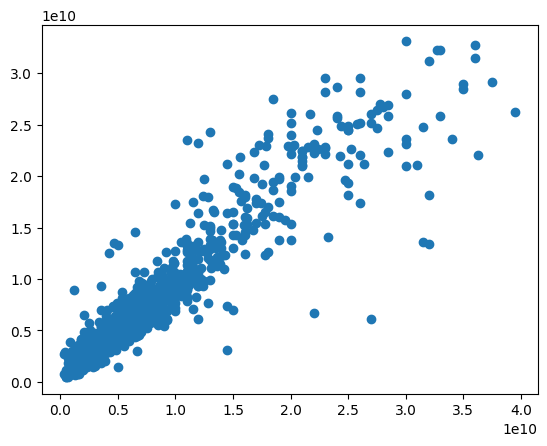

R2 Score: 0.8941944668350574
MAPE: 0.8442910991438813
acc: 0.7964285714285714
final score:  0.8449713791358366


In [1326]:
model = GradientBoostingRegressor( n_estimators=250 ,  max_depth=10 , random_state=5 )

r2, mape , accuracy = fit_and_evaluate(model, X_train, y_train, X_test, y_test)

print("R2 Score:", r2)
print("MAPE:", (1-mape))
print("acc:", accuracy)
print('final score: ' ,  (r2+(1-mape)+accuracy)/3)

In [1327]:
y_pred = model.predict(X_test)
Finall_Prediction = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})
Finall_Prediction['absolute_error'] = abs(Finall_Prediction['y_test'] - Finall_Prediction['y_pred'])
Finall_Prediction

,y_test,y_pred,absolute_error
20128,3730000000,3.534858e+09,1.951417e+08
5613,24000000000,2.588377e+10,1.883773e+09
29978,10900000000,8.566506e+09,2.333494e+09
17905,2750000000,2.400305e+09,3.496954e+08
40520,3500000000,2.307477e+09,1.192523e+09
...,...,...,...
13356,2100000000,2.655109e+09,5.551086e+08
10534,3150000000,3.084431e+09,6.556899e+07
27452,7700000000,7.264092e+09,4.359082e+08
499,2745000000,2.682894e+09,6.210567e+07


# Model 2 : Random Forest (price bin =35) 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


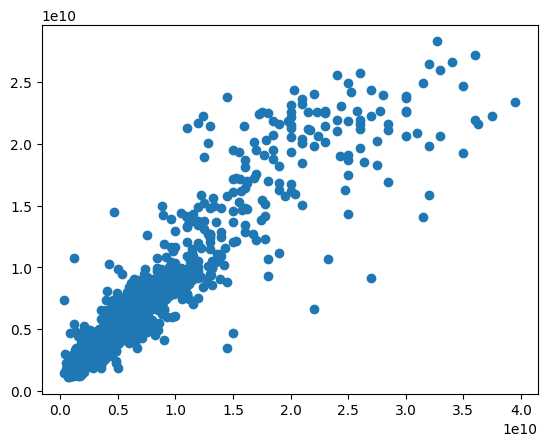

R2 Score: 0.8641742334731
MAPE: 0.7815939273126381
acc: 0.6852678571428571
final score:  0.7770120059761983


In [1328]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators= 250 , max_depth=10 ,random_state=1,max_features='sqrt' , verbose=True)
r2, mape , accuracy = fit_and_evaluate(model, X_train, y_train, X_test, y_test)

print("R2 Score:", r2)
print("MAPE:", (1-mape))
print("acc:", accuracy)
print('final score: ' ,  (r2+(1-mape)+accuracy)/3)

In [1329]:
y_pred = model.predict(X_test)
Finall_Prediction = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})
Finall_Prediction['absolute_error'] = abs(Finall_Prediction['y_test'] - Finall_Prediction['y_pred'])
Finall_Prediction

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


,y_test,y_pred,absolute_error
20128,3730000000,3.449729e+09,2.802709e+08
5613,24000000000,2.105244e+10,2.947562e+09
29978,10900000000,8.414067e+09,2.485933e+09
17905,2750000000,2.772565e+09,2.256461e+07
40520,3500000000,1.831990e+09,1.668010e+09
...,...,...,...
13356,2100000000,2.984012e+09,8.840121e+08
10534,3150000000,3.088887e+09,6.111332e+07
27452,7700000000,8.195656e+09,4.956562e+08
499,2745000000,3.141011e+09,3.960110e+08


# Model 3 : Linear Regression (price bin =35) 

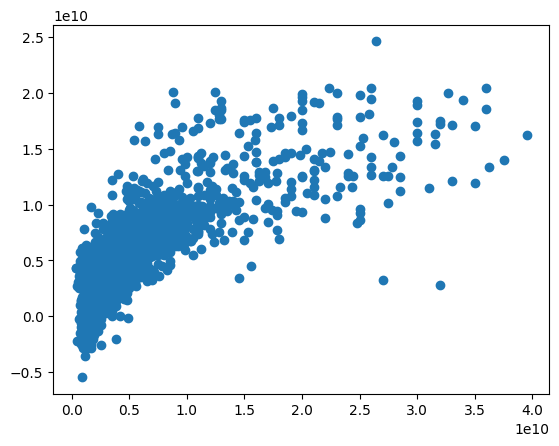

R2 Score: 0.5907187755739384
MAPE: 0.4679446208910877
acc: 0.33214285714285713
final score:  0.463602084535961


In [1330]:
model = LinearRegression()
r2, mape , accuracy = fit_and_evaluate(model, X_train, y_train, X_test, y_test)

print("R2 Score:", r2)
print("MAPE:", (1-mape))
print("acc:", accuracy)
print('final score: ' ,  (r2+(1-mape)+accuracy)/3)

In [1331]:
y_pred = model.predict(X_test)
Finall_Prediction = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})
Finall_Prediction['absolute_error'] = abs(Finall_Prediction['y_test'] - Finall_Prediction['y_pred'])
Finall_Prediction

,y_test,y_pred,absolute_error
20128,3730000000,2.250546e+09,1.479454e+09
5613,24000000000,1.254530e+10,1.145470e+10
29978,10900000000,7.571630e+09,3.328370e+09
17905,2750000000,2.902001e+09,1.520006e+08
40520,3500000000,5.094373e+08,2.990563e+09
...,...,...,...
13356,2100000000,2.959828e+09,8.598277e+08
10534,3150000000,4.474770e+09,1.324770e+09
27452,7700000000,7.253845e+09,4.461546e+08
499,2745000000,3.995837e+09,1.250837e+09


# Model 4 : XGB (price bin =35) 

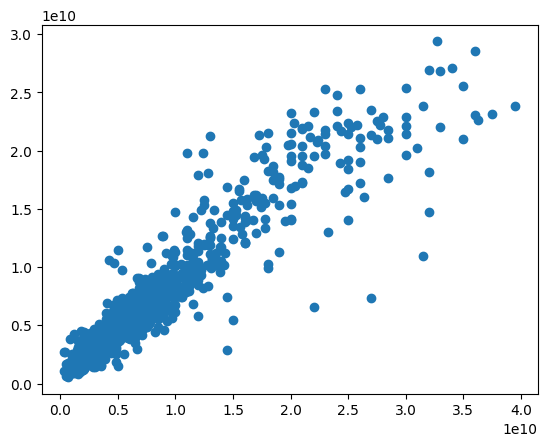

R2 Score: 0.8746169937201745
MAPE: 0.8386069654339664
acc: 0.7616071428571428
final score:  0.824943700670428


In [1334]:
model = XGBRegressor(n_estimators=250, learning_rate=0.01, gamma=0, subsample=0.75,max_depth=10,random_state=5,
                   min_child_weight=1,colsample_bytree=0.8)

r2, mape , accuracy = fit_and_evaluate(model, X_train, y_train, X_test, y_test)

print("R2 Score:", r2)
print("MAPE:", (1-mape))
print("acc:", accuracy)
print('final score: ' ,  (r2+(1-mape)+accuracy)/3)

In [1335]:
y_pred = model.predict(X_test)
Finall_Prediction = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})
Finall_Prediction['absolute_error'] = abs(Finall_Prediction['y_test'] - Finall_Prediction['y_pred'])
Finall_Prediction

,y_test,y_pred,absolute_error
20128,3730000000,3.216443e+09,5.135571e+08
5613,24000000000,2.208478e+10,1.915220e+09
29978,10900000000,7.864464e+09,3.035536e+09
17905,2750000000,2.208989e+09,5.410111e+08
40520,3500000000,1.523062e+09,1.976938e+09
...,...,...,...
13356,2100000000,2.545570e+09,4.455695e+08
10534,3150000000,2.943359e+09,2.066408e+08
27452,7700000000,7.218665e+09,4.813350e+08
499,2745000000,2.603690e+09,1.413103e+08
